# Atividade 03
Bianca Bonetti Nunes

### Importando a série temporal de interesse

In [197]:
# Importanto pacotes
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [198]:
#importando a planilha com dados
cwd = os.getcwd()
path = cwd+'\\Dados\\ES_planilhacompleta.csv'
print(path)
data = pd.read_csv(path,encoding='latin-1')
data.head()

C:\Users\BiaBN\OneDrive\Documentos\ENS410064\Dados\ES_planilhacompleta.csv


C:\Users\BiaBN\AppData\Local\Temp\ipykernel_22640\3387021123.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path,encoding='latin-1')


Ano  Mes  Dia  Hora  Minuto      Estacao Estacao.1 Poluente  Valor  \
0  2023    1    1     0      30  Laranjeiras    ES_001       O3  29.89   
1  2023    1    1     1      30  Laranjeiras    ES_001       O3   26.2   
2  2023    1    1     2      30  Laranjeiras    ES_001       O3  20.27   
3  2023    1    1     3      30  Laranjeiras    ES_001       O3  23.22   
4  2023    1    1     4      30  Laranjeiras    ES_001       O3  21.53   

  Unidade        Tipo    Testacao  
0   ug/m3  Automatica  Referencia  
1   ug/m3  Automatica  Referencia  
2   ug/m3  Automatica  Referencia  
3   ug/m3  Automatica  Referencia  
4   ug/m3  Automatica  Referencia

### Filtrando os dados de uma só estação - A estação escolhida foi ES_001

In [199]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [200]:
poluentes = data['Poluente'].unique().tolist()
print(poluentes)
colors = ['purple', '#04b1d6', '#ffce05', '#ff9905', '#2e53ef','#ef2ebf', '#0ed309','#0d6a0b','#d88bea','#c91d52','#c91d1d','#dae949']

['O3', 'NO2', 'NO', 'NOX', 'SO2', 'CO', 'MP10', 'MP25', 'CH4', 'NMHC', 'THC', 'PTS']


In [201]:
estacao = 'ES_005'
data_filtrada = data.loc[(data['Estacao.1'] == estacao)]  # Filtrando apenas a estação ES_001
data_filtrada.head()
#transformando a coluna Valor em float
data_filtrada['Valor'] = data_filtrada['Valor'].astype('float')
data_filtrada.dtypes

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_22640\3364014529.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['Valor'] = data_filtrada['Valor'].astype('float')


Ano            int64
Mes            int64
Dia            int64
Hora           int64
Minuto         int64
Estacao       object
Estacao.1     object
Poluente      object
Valor        float64
Unidade       object
Tipo          object
Testacao      object
dtype: object

In [202]:
#checando se existem dados faltantes
print(np.sum(data_filtrada.iloc[:].isna()))

Ano              0
Mes              0
Dia              0
Hora             0
Minuto           0
Estacao          0
Estacao.1        0
Poluente         0
Valor        32206
Unidade          0
Tipo             0
Testacao         0
dtype: int64


c:\users\biabn\onedrive\documentos\ens410064\pyenv\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [203]:
#Criando um datetime
data_filtrada['datetime'] = pd.to_datetime(data_filtrada[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].astype(str).agg('-'.join,axis =1), format = '%Y-%m-%d-%H-%M')
data_filtrada = data_filtrada.set_index("datetime")
data_filtrada.head()

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_22640\1365032883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['datetime'] = pd.to_datetime(data_filtrada[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].astype(str).agg('-'.join,axis =1), format = '%Y-%m-%d-%H-%M')


Ano  Mes  Dia  Hora  Minuto         Estacao Estacao.1  \
datetime                                                                      
2023-01-01 00:30:00  2023    1    1     0      30  Enseada do Sua    ES_005   
2023-01-01 01:30:00  2023    1    1     1      30  Enseada do Sua    ES_005   
2023-01-01 02:30:00  2023    1    1     2      30  Enseada do Sua    ES_005   
2023-01-01 03:30:00  2023    1    1     3      30  Enseada do Sua    ES_005   
2023-01-01 04:30:00  2023    1    1     4      30  Enseada do Sua    ES_005   

                    Poluente  Valor Unidade        Tipo    Testacao  
datetime                                                             
2023-01-01 00:30:00     MP25    NaN   ug/m3  Automatica  Referencia  
2023-01-01 01:30:00     MP25    NaN   ug/m3  Automatica  Referencia  
2023-01-01 02:30:00     MP25    NaN   ug/m3  Automatica  Referencia  
2023-01-01 03:30:00     MP25    NaN   ug/m3  Automatica  Referencia  
2023-01-01 04:30:00     MP25    NaN   ug/m3  Automatica  Referencia

### Fazendo graficos de linha para cada poluente


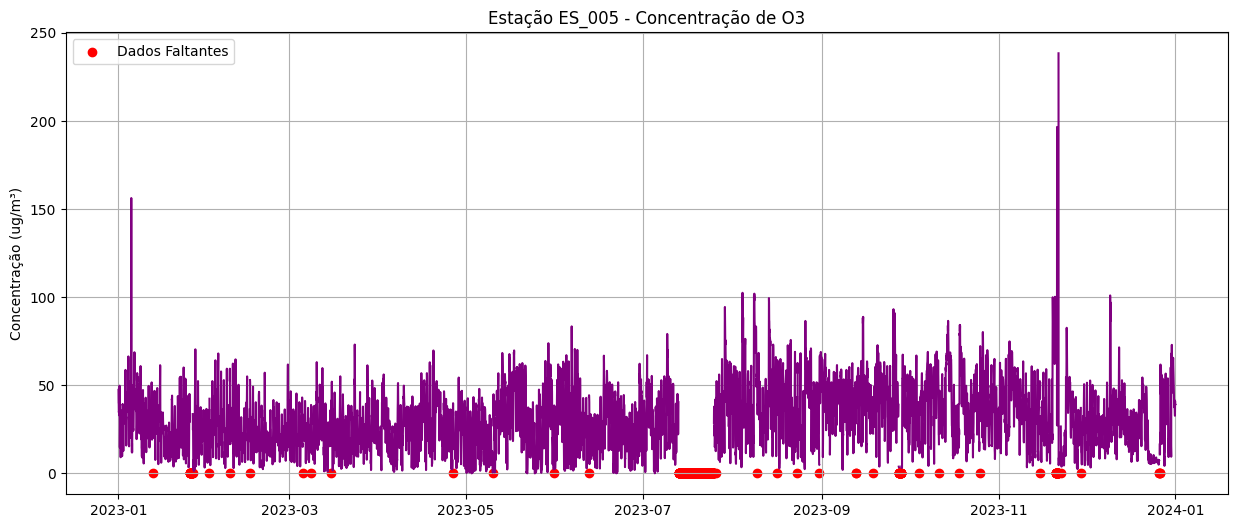

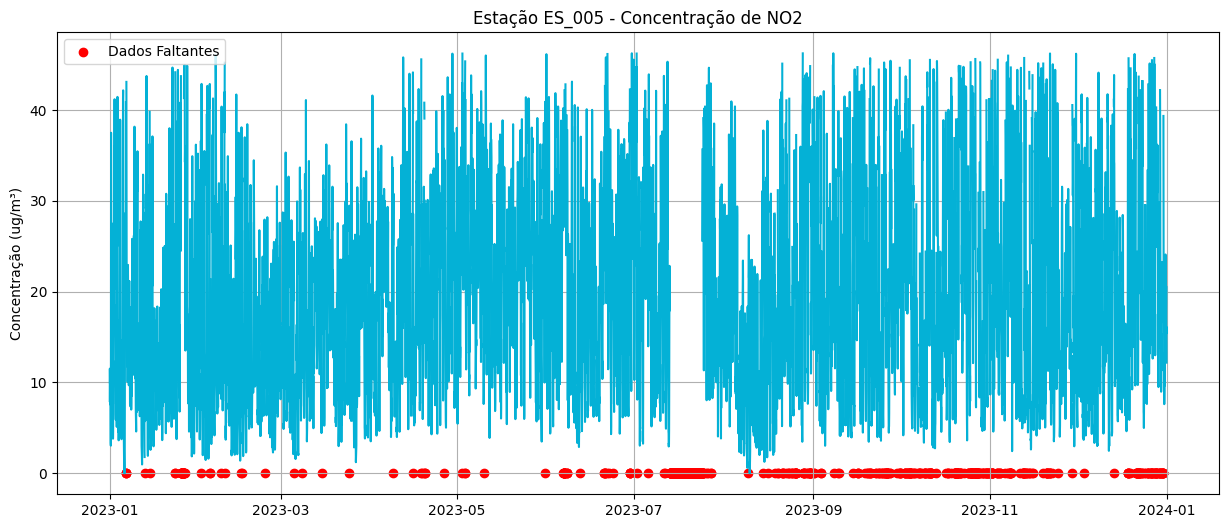

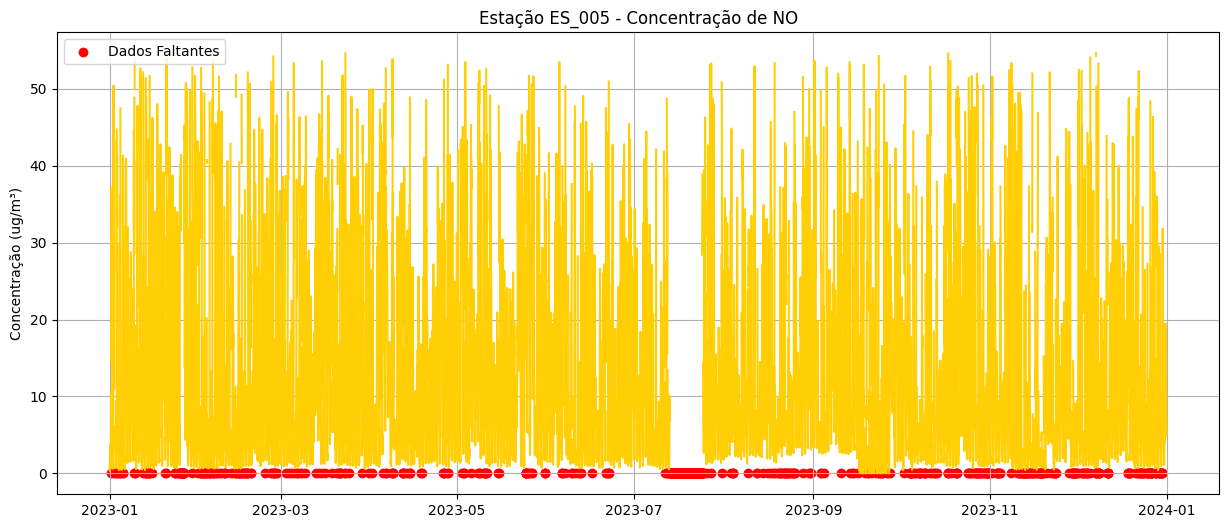

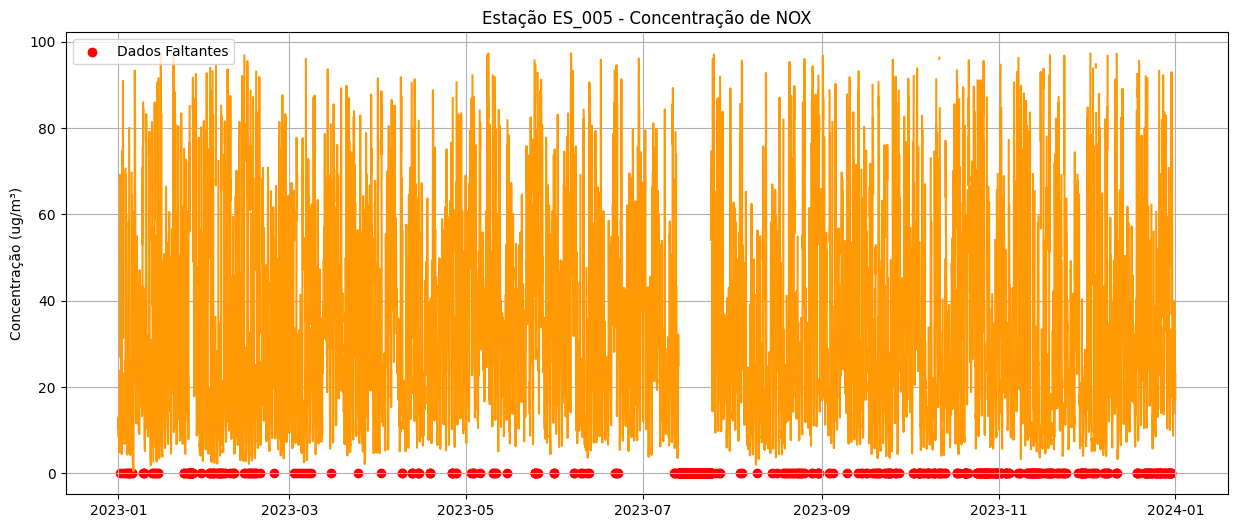

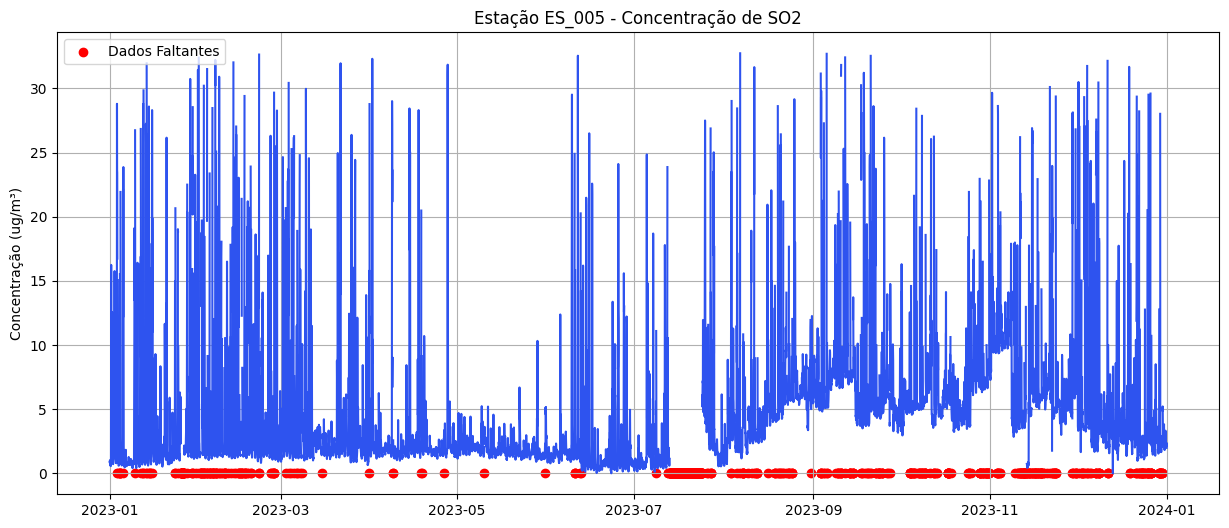

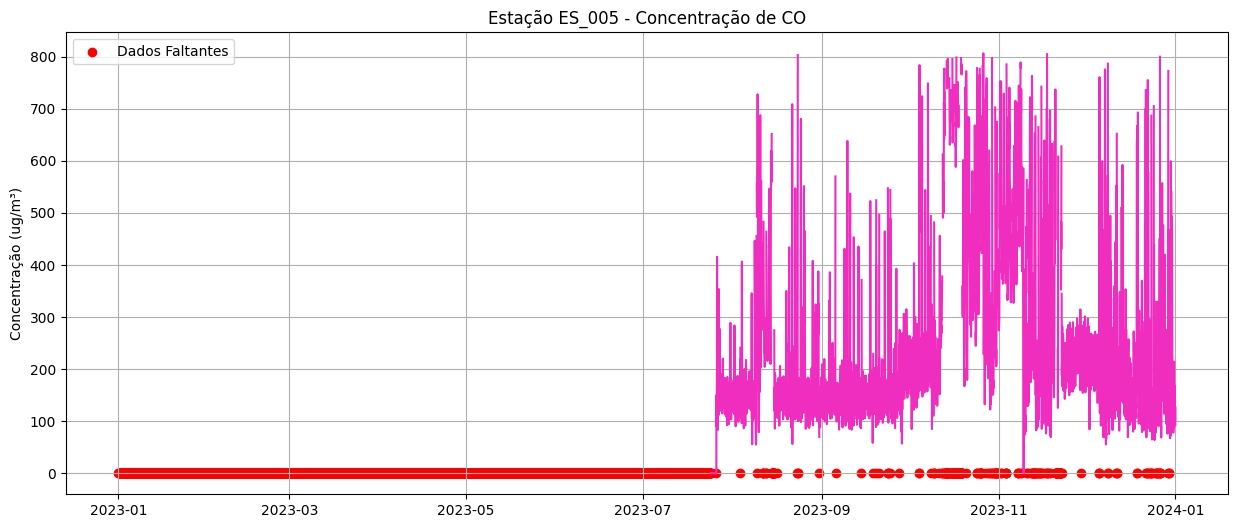

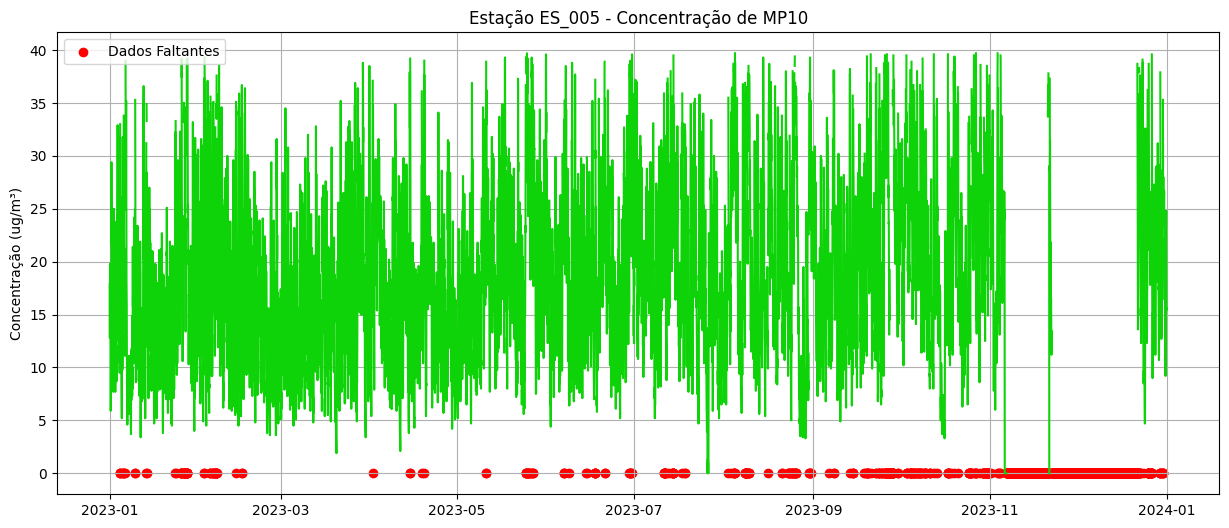

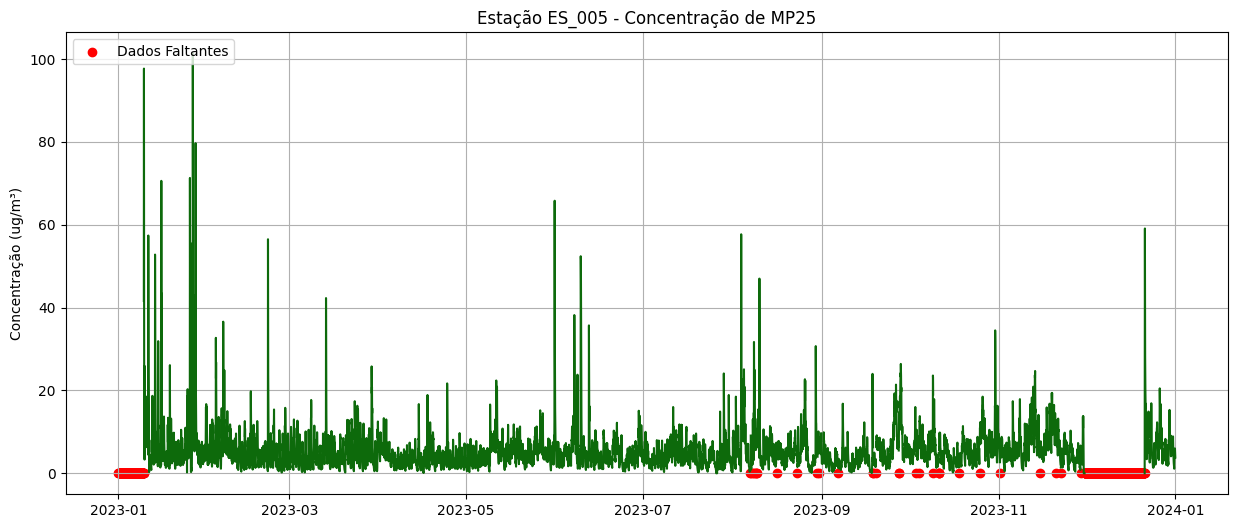

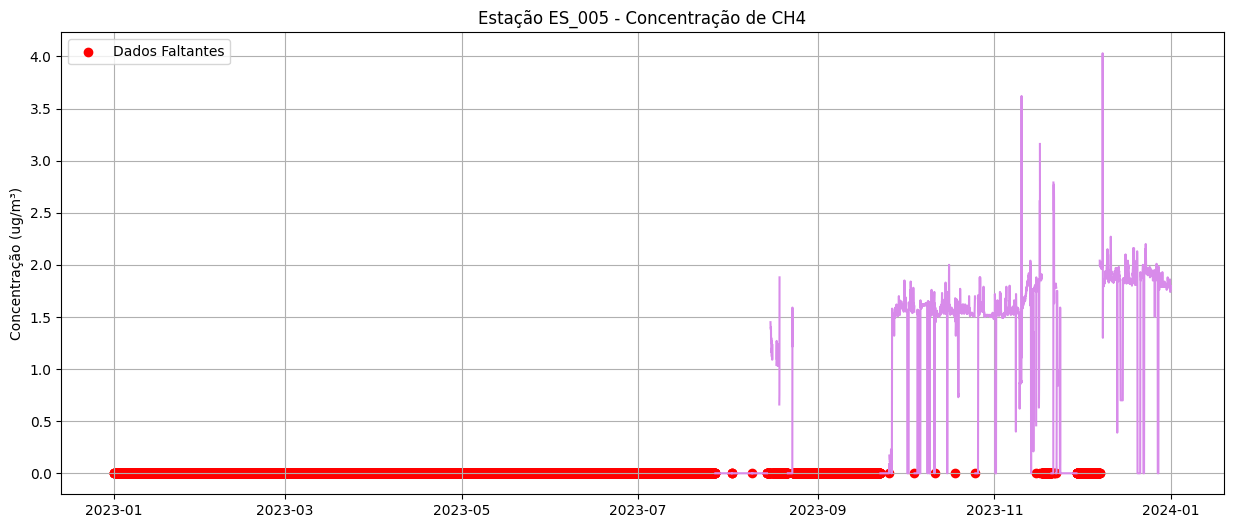

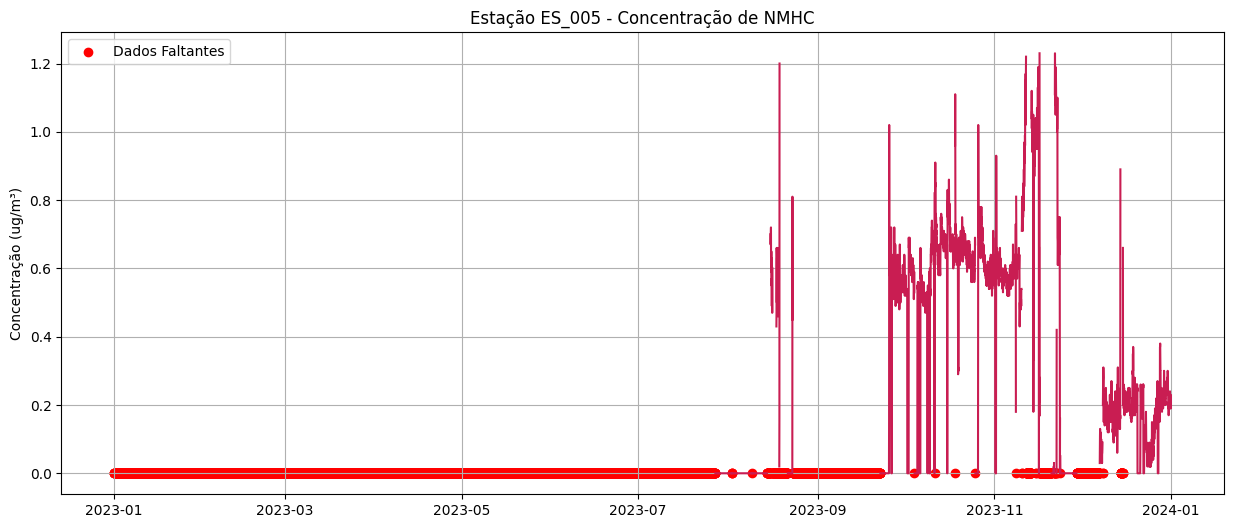

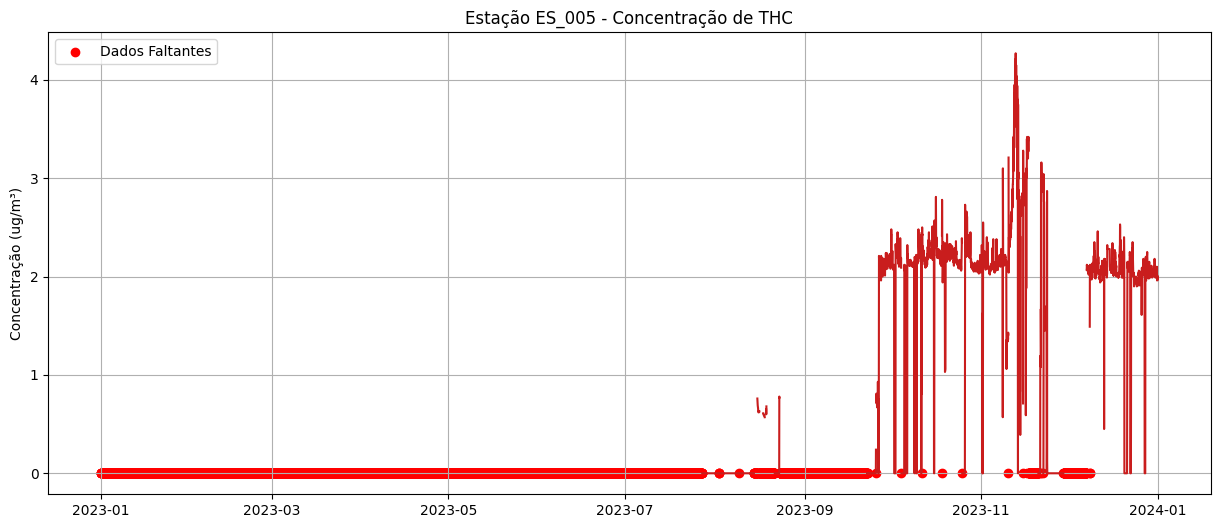

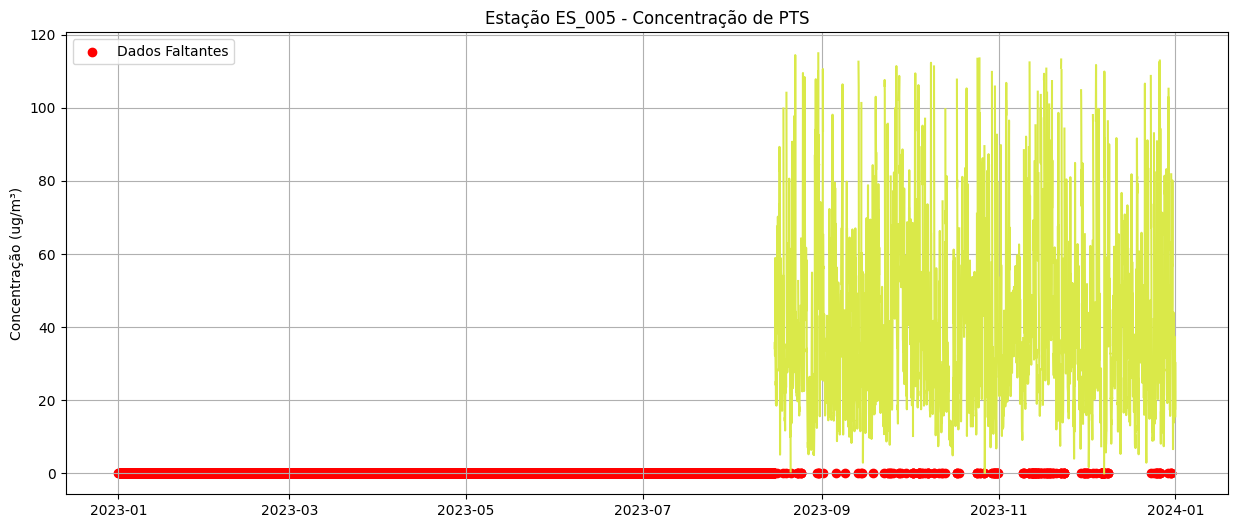

In [204]:
data_filtrada['Valor'] = data_filtrada['Valor'].mask(data_filtrada['Valor'] < 0, np.nan)
data_filtrada['Dia_da_Semana'] = data_filtrada.index.day_name(locale='pt_BR').str[:3]
limites = {
    'MP10': 45,        # Limite em µg/m³ para Partículas Inaláveis (PM10)
    'MP25': 15,       # Limite em µg/m³ para Partículas Finas (PM2.5)
    'NO2': 200,         # Limite em µg/m³ para Dióxido de Nitrogênio (NO2)
    'O3': 100,         # Limite em µg/m³ para Ozônio (O3)
    'CO': 11250,          # Limite em mg/m³ para Monóxido de Carbono (CO)
    'SO2': 40          # Limite em µg/m³ para Dióxido de Enxofre (SO2)
}
for ii,polu in enumerate(poluentes):
    plt.figure(figsize=(15, 6))
    df_poluente = data_filtrada.loc[data_filtrada['Poluente'] == polu].copy()
    if df_poluente['Valor'].mean()>0:
        mediana = df_poluente['Valor'].median()
        desvio_padrao = df_poluente['Valor'].std()
        # Filtrar para manter apenas os valores que são menores ou iguais a 2 vezes a mediana
        df_poluente['Valor'] = np.where(
        (df_poluente['Valor'] >= mediana-2*desvio_padrao) & (df_poluente['Valor'] <= mediana+2*desvio_padrao),
        df_poluente['Valor'],
        np.nan)        
        plt.plot(df_poluente.index,df_poluente['Valor'],color = colors[ii])
        plt.scatter(df_poluente.index[df_poluente.iloc[:,8].isna()],np.zeros(np.sum(df_poluente.iloc[:,8].isna())),color='red', label = 'Dados Faltantes')
        #if polu in limites:
        #    label_limite = 'Limite de '+polu
        #    plt.axhline(y= limites[polu], color= 'red', linestyle='--', label=label_limite)
        plt.grid(True)
        title = 'Estação '+estacao+' - Concentração de '+polu
        plt.title(title)
        plt.ylabel('Concentração (ug/m³)')
        plt.legend(loc='upper left')
        #salvando figuras
        os.makedirs(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao,exist_ok = True)
        plt.savefig(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.png')
        plt.show()


### Fazendo Gráficos das Médias Diárias

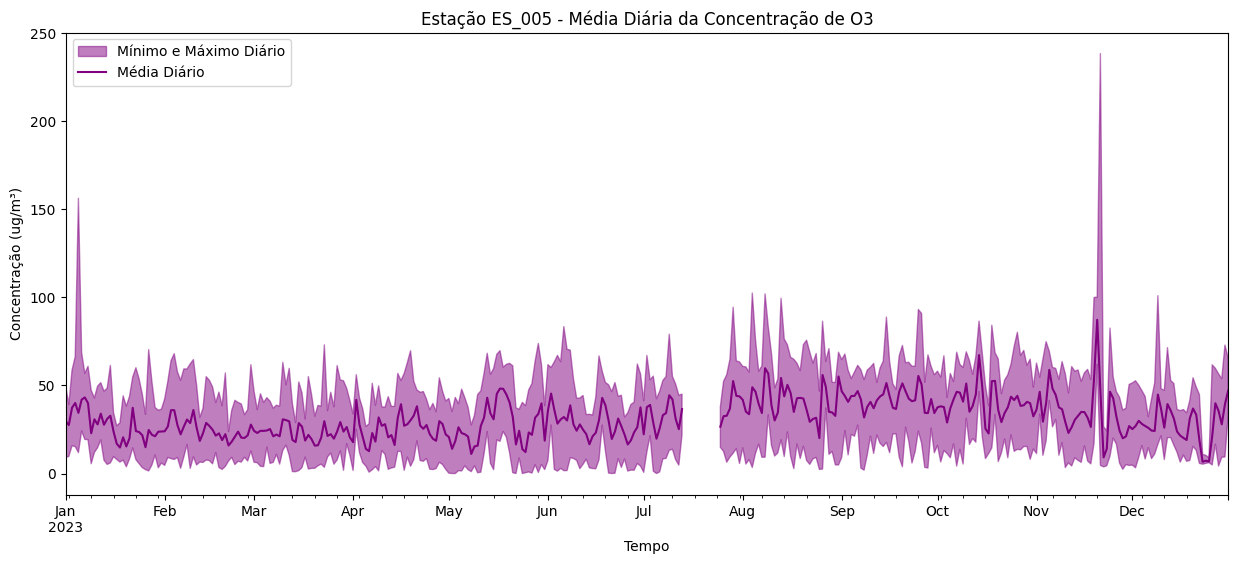

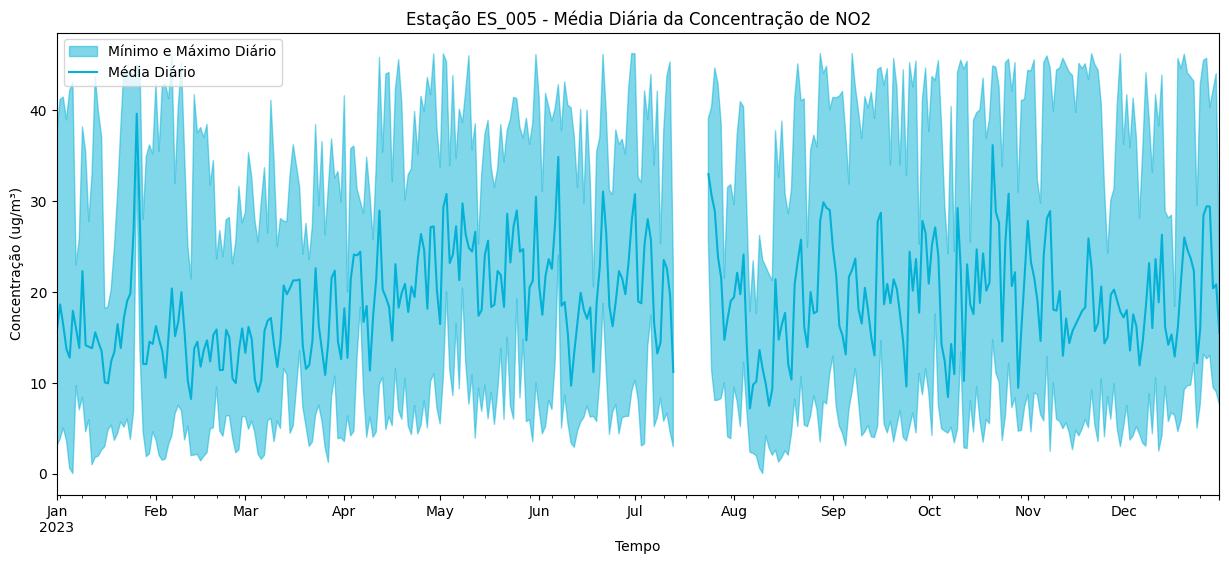

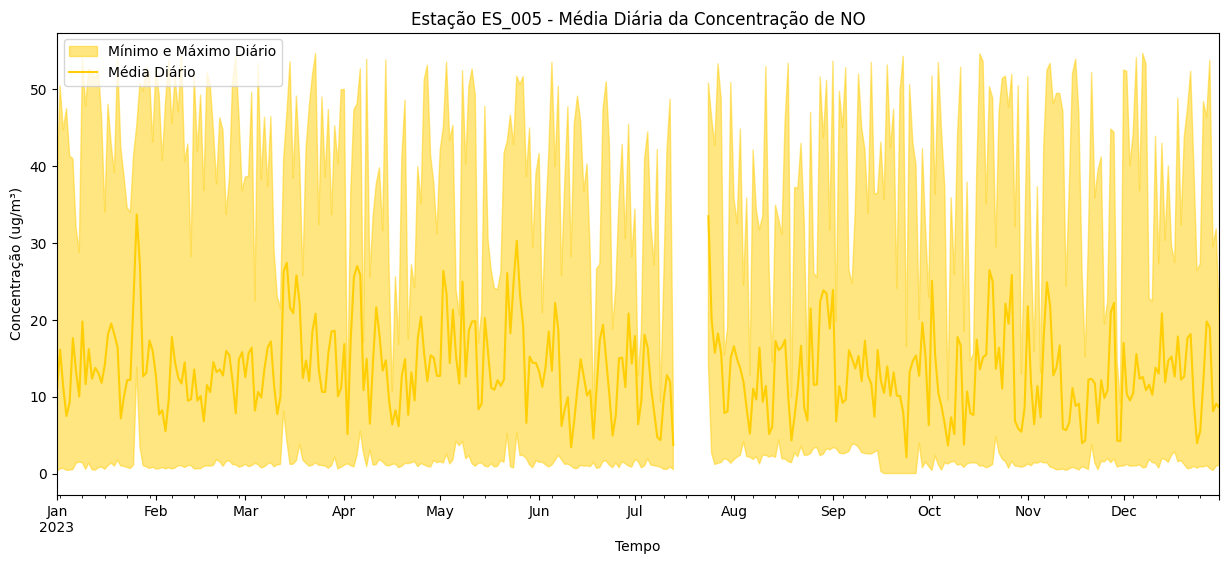

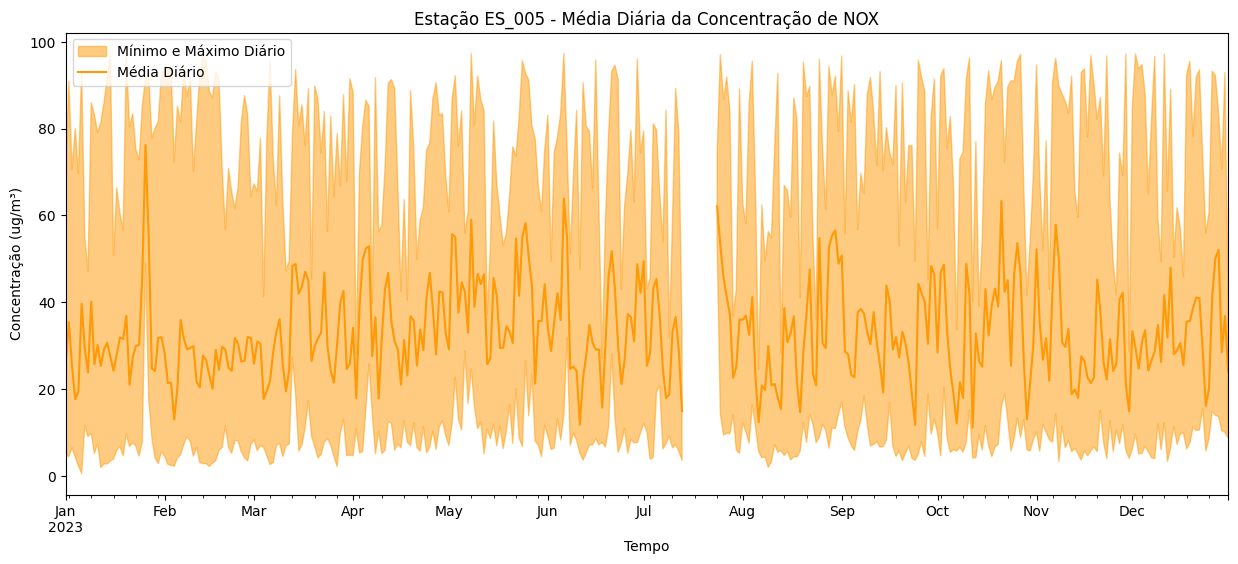

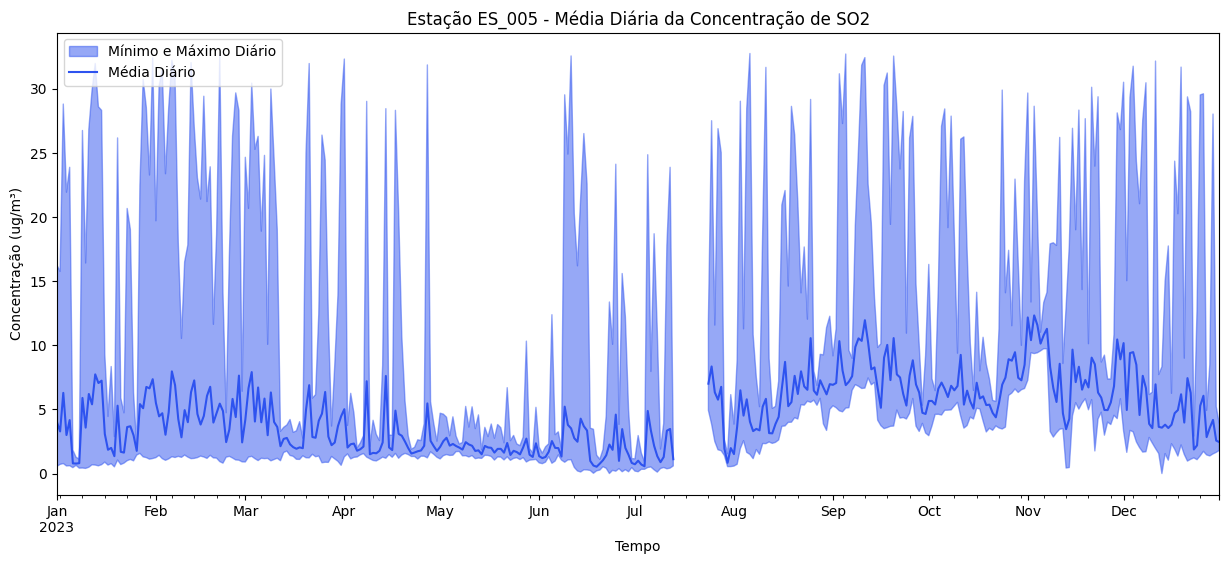

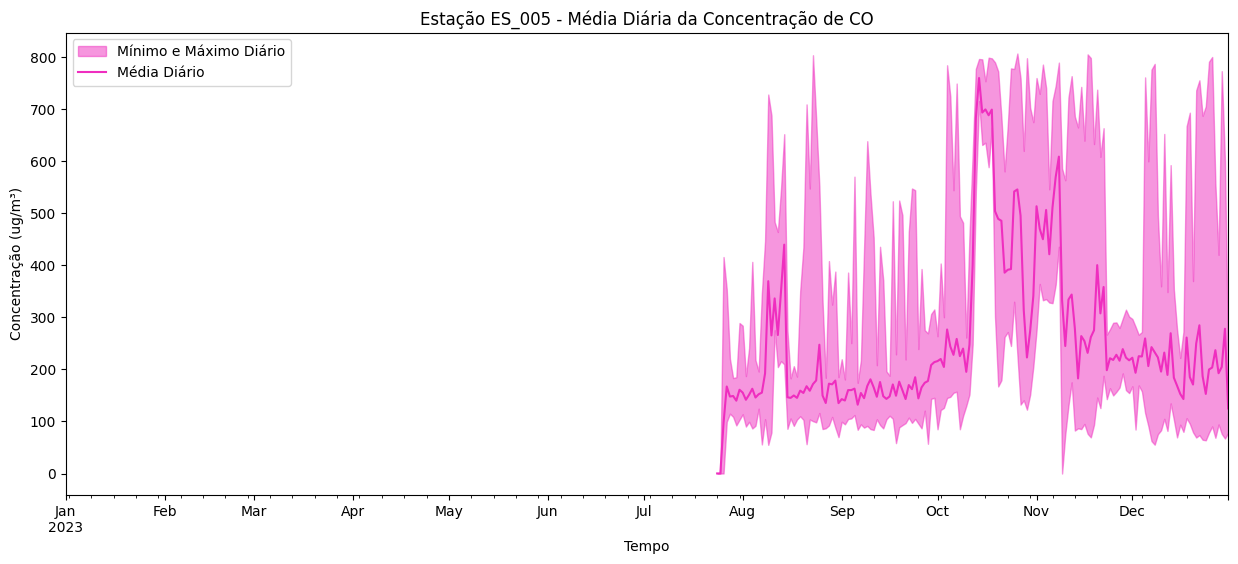

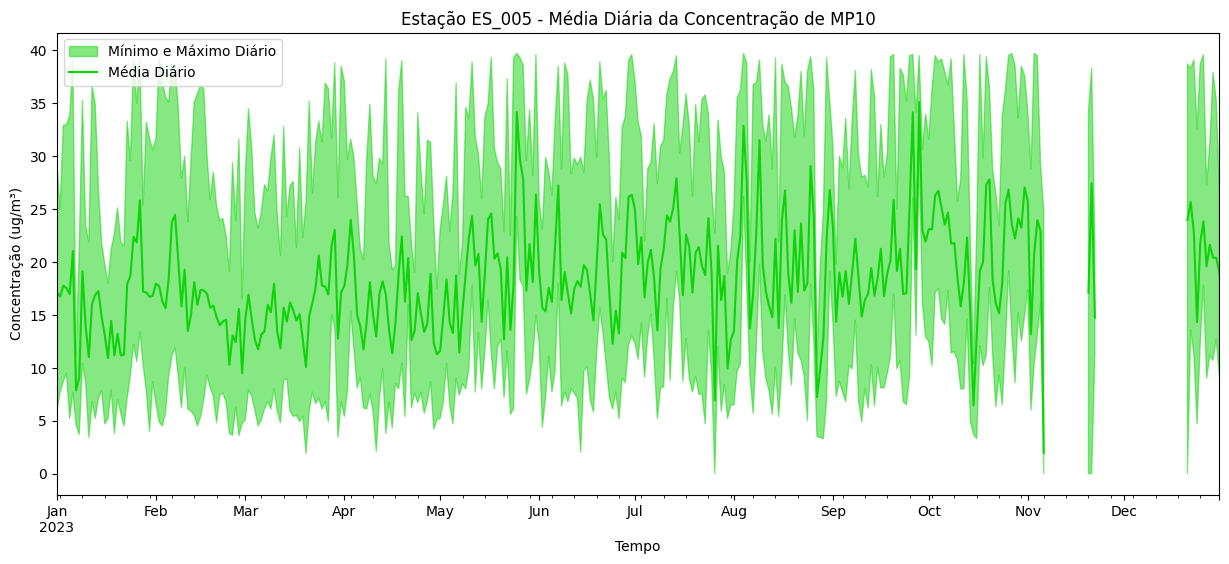

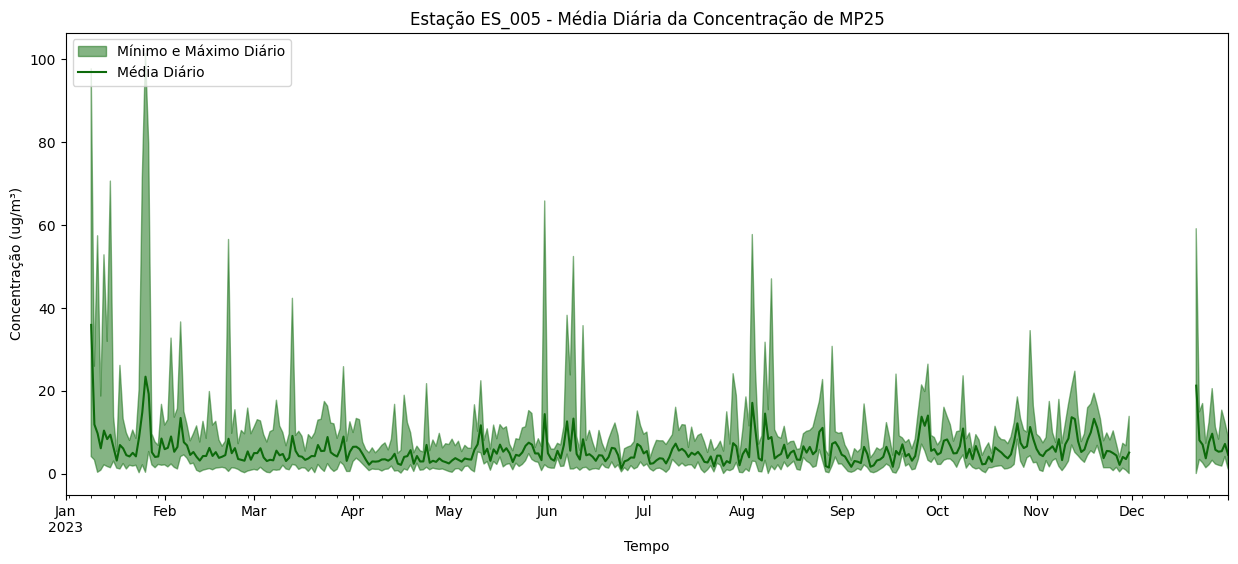

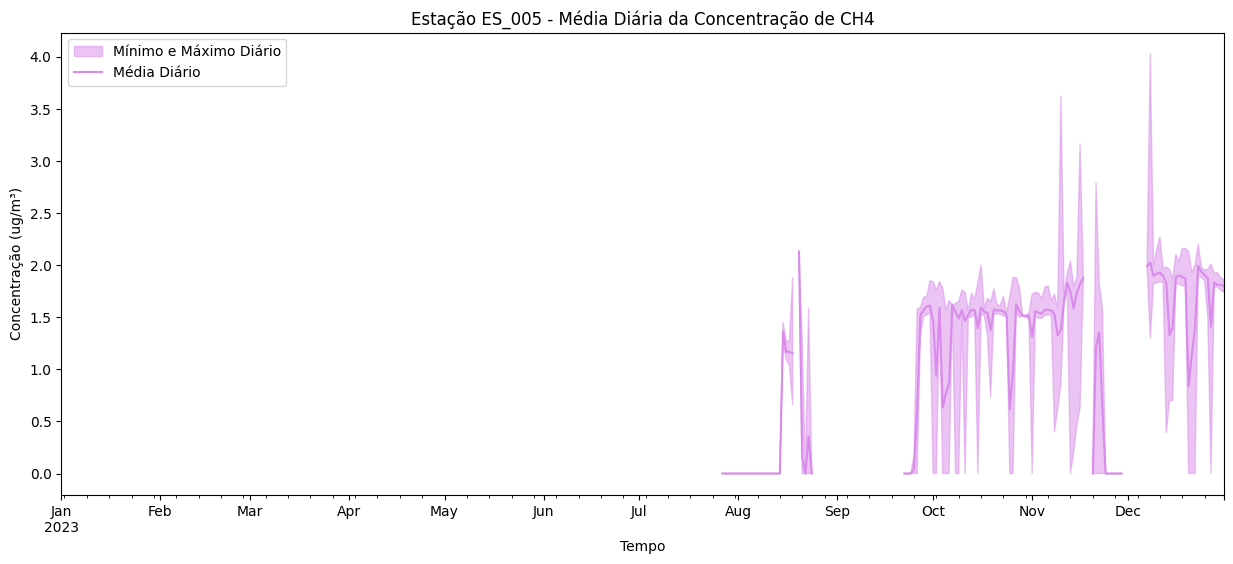

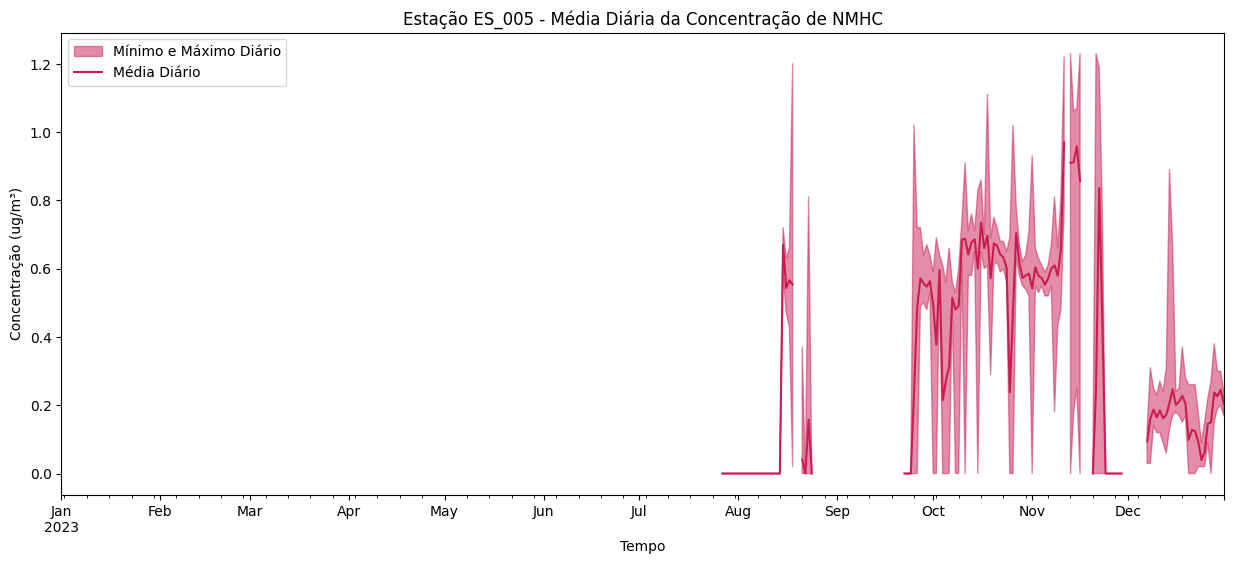

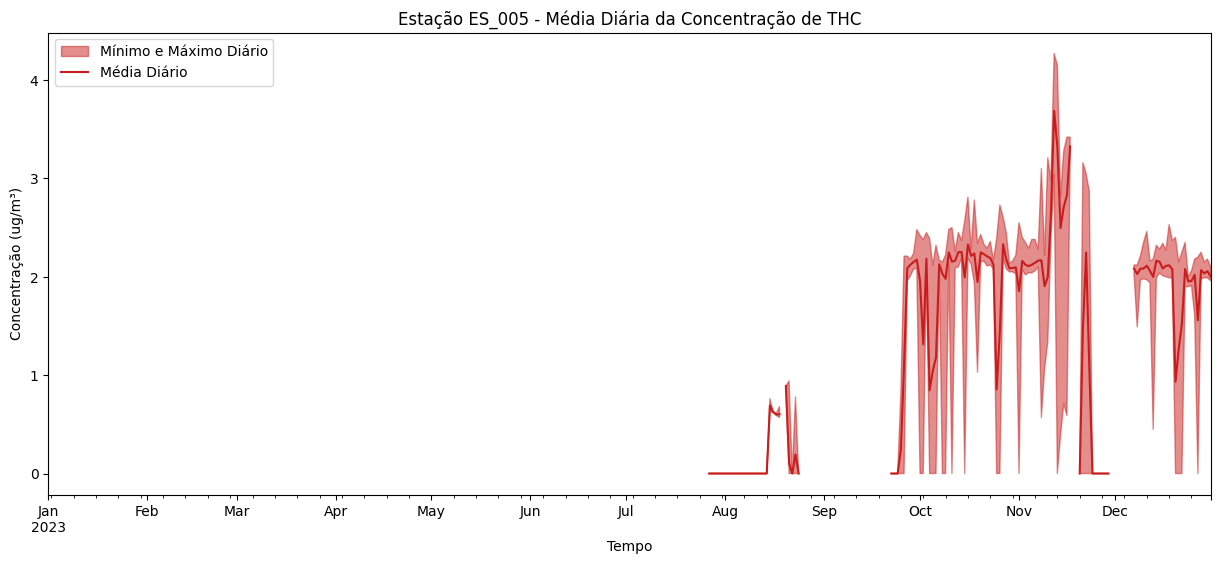

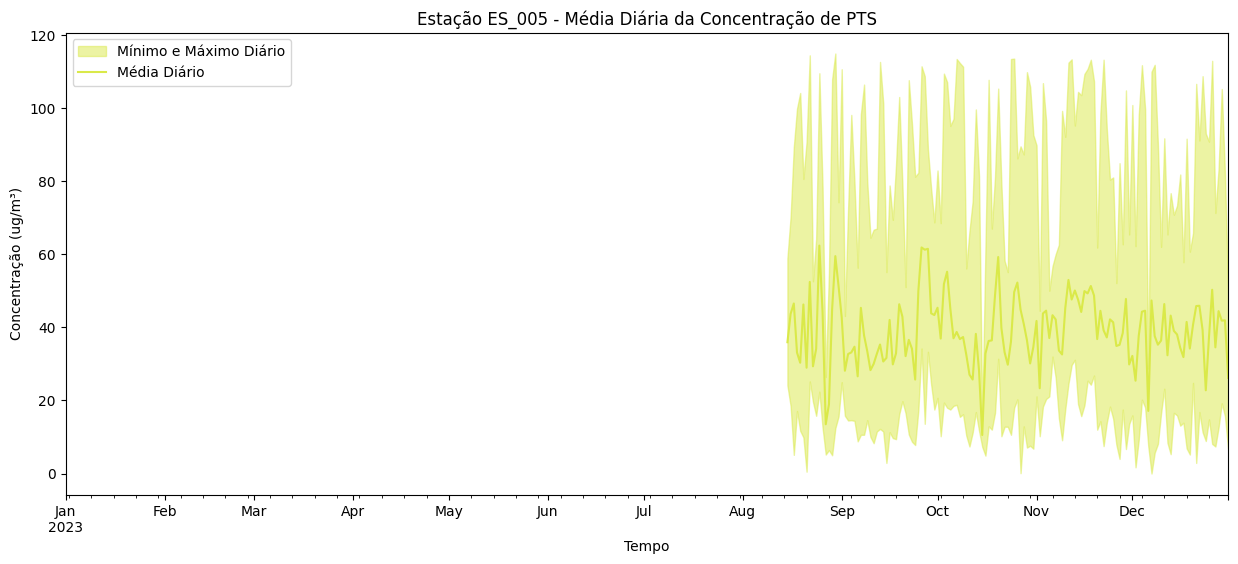

In [205]:
for jj, polu in enumerate(poluentes):   
    # Calcula a média, mínima e máxima diária
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)]
    if df_poluente['Valor'].mean()>0:
        mediana = df_poluente['Valor'].median()
        desvio_padrao = df_poluente['Valor'].std()
        # Filtrar para manter apenas os valores que são menores ou iguais a 2 vezes a mediana
        df_poluente.loc[:, 'Valor'] = np.where(
        (df_poluente['Valor'] >= mediana-2*desvio_padrao) & (df_poluente['Valor'] <= mediana+2*desvio_padrao),
        df_poluente['Valor'],
        np.nan)
        
        media_diaria_poluente = df_poluente['Valor'].resample('D').mean()  #Resample('D'),reamostrar os dados em uma base diária e calculua a media
        min_diaria_poluente = df_poluente['Valor'].resample('D').min()
        max_diaria_poluente = df_poluente['Valor'].resample('D').max()
        
        plt.figure(figsize=(15, 6))
        
        # Área sombreada entre os valores mínimo e máximo
        plt.fill_between(min_diaria_poluente.index, min_diaria_poluente, max_diaria_poluente, color=colors[jj], alpha=0.5, label='Mínimo e Máximo Diário')
        
        # Plota a média diária
        media_diaria_poluente.plot(color=colors[jj], legend=True, label='Média Diário')
        
        plt.xlabel('Tempo')
        plt.ylabel('Concentração (ug/m³)')
        title = 'Estação '+estacao+' - Média Diária da Concentração de '+polu
        plt.title(title)
        plt.legend(loc='upper left')
        #salvando figuras
        plt.savefig(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.png')
        plt.show()

### Plotando Gráficos Boxsplot

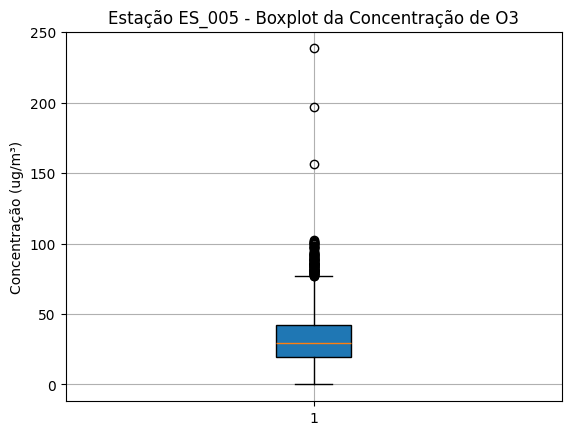

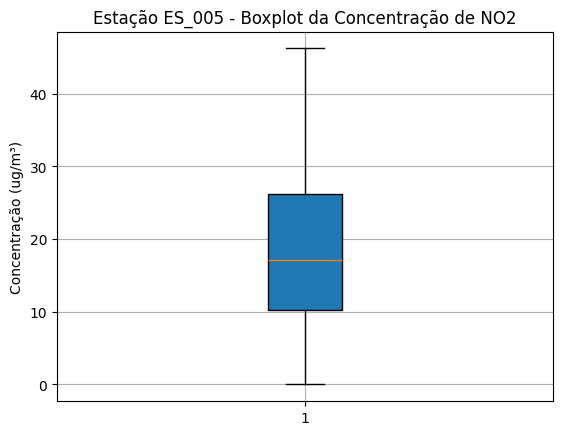

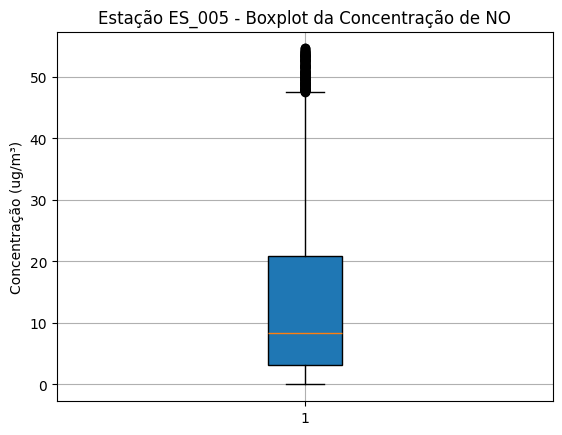

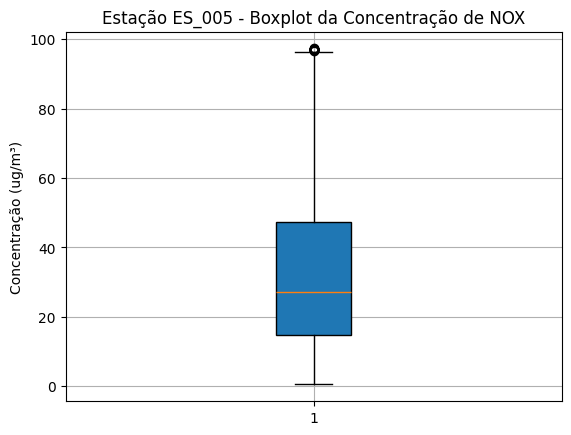

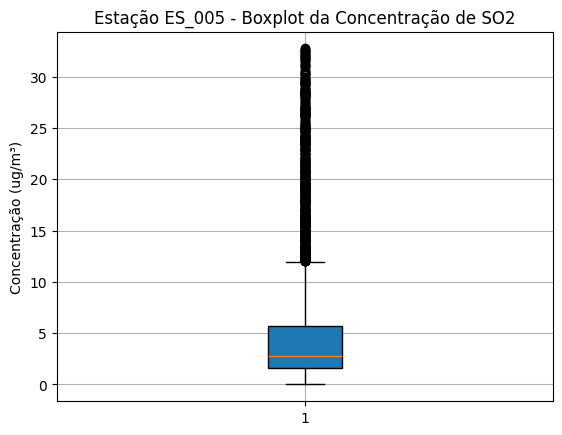

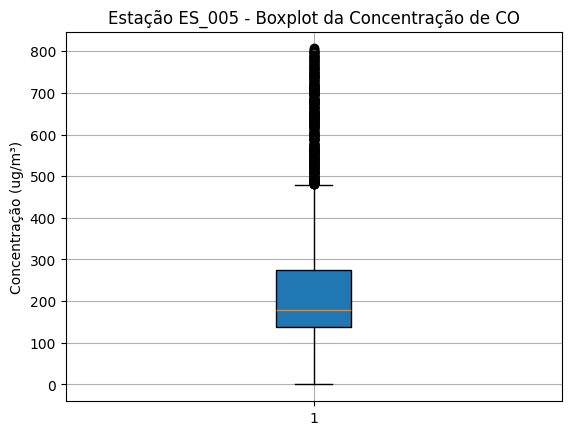

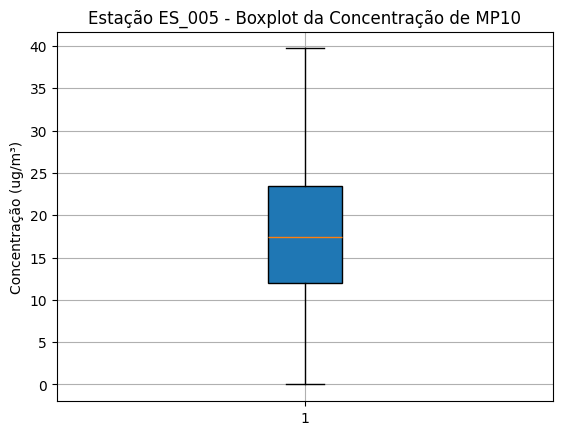

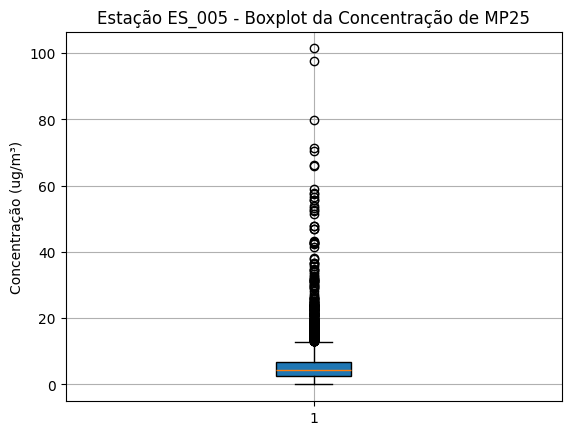

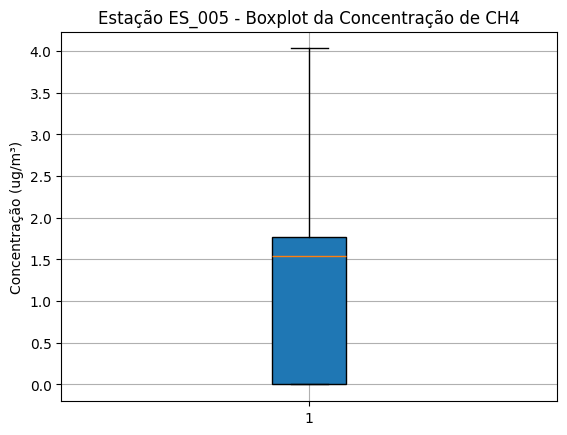

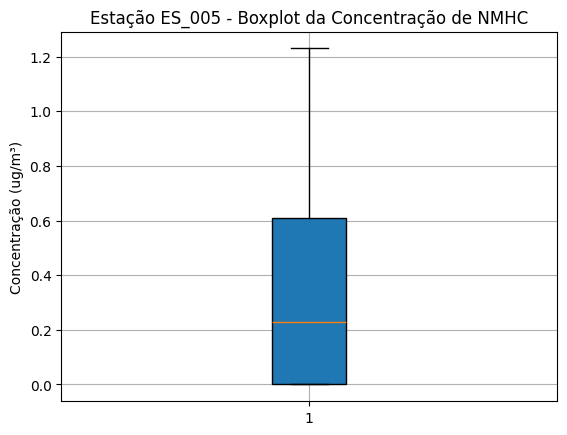

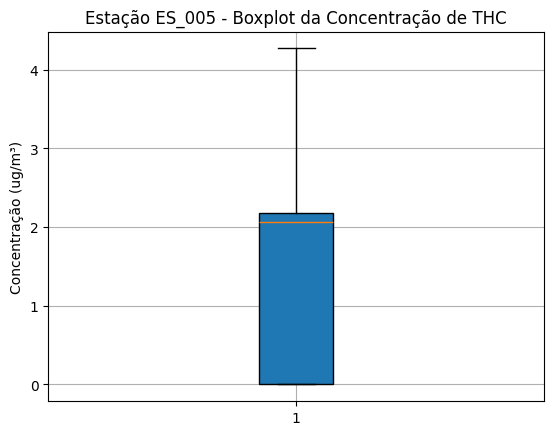

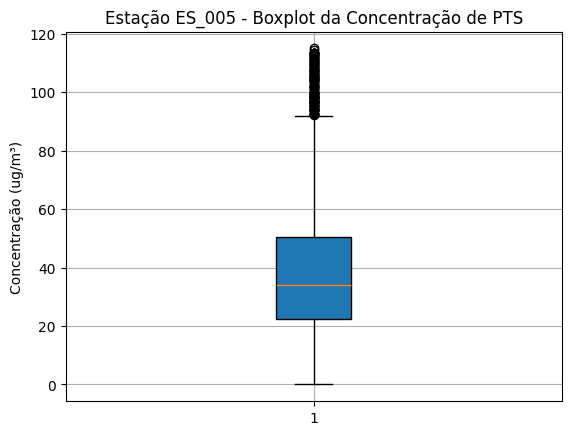

In [206]:
for polu in poluentes:
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)]
    # Removendo valores ausentes da coluna 'Valor'
    df_poluente = df_poluente.dropna(subset=['Valor'])
    if len(df_poluente) > 0:
        mediana = df_poluente['Valor'].median()
        desvio_padrao = df_poluente['Valor'].std()
        # Filtrar para manter apenas os valores que são menores ou iguais a 2 vezes a mediana
        df_poluente = df_poluente[(df_poluente['Valor'] >= mediana-2*desvio_padrao)&(df_poluente['Valor'] <= mediana+2*desvio_padrao)]
        
        plt.boxplot(df_poluente['Valor'], vert=True, patch_artist=True)
        title = 'Estação '+estacao+' - Boxplot da Concentração de '+polu
        plt.title(title)
        plt.ylabel('Concentração (ug/m³)')
        plt.grid(True)
        #salvando figuras
        plt.savefig(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.png')
        plt.show()

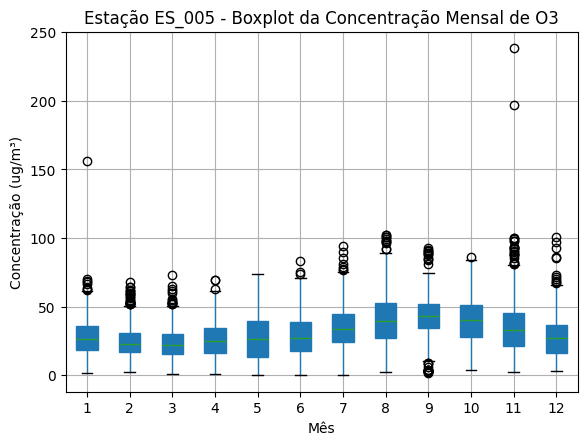

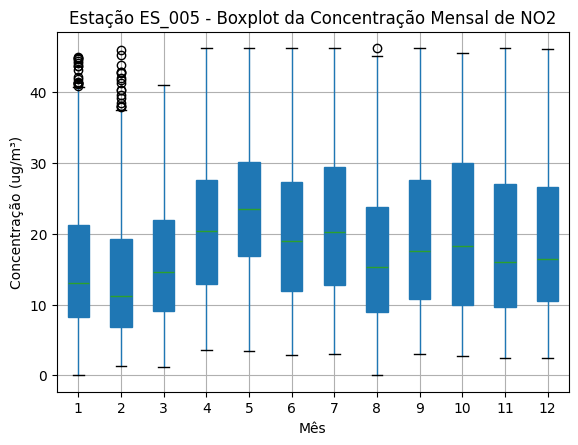

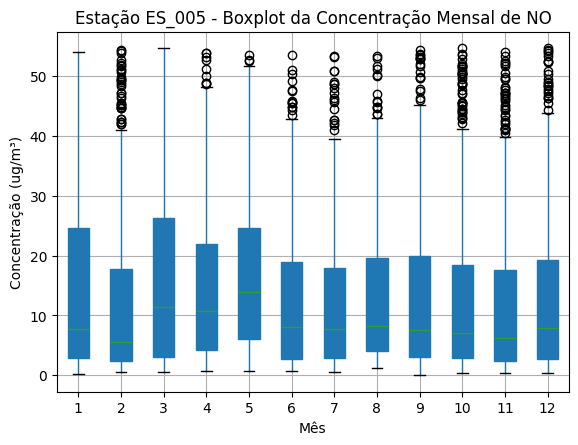

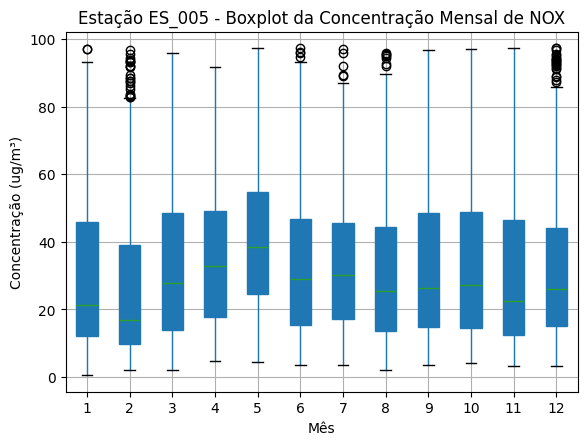

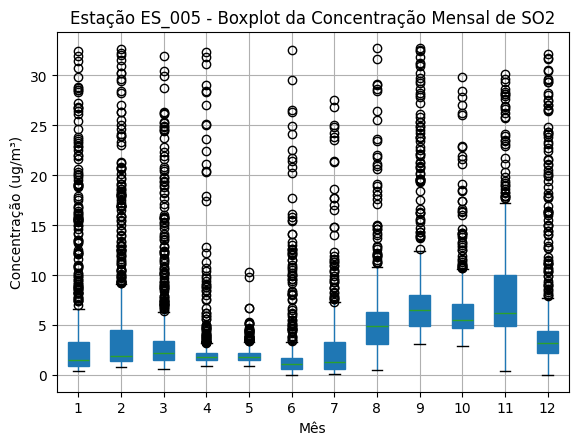

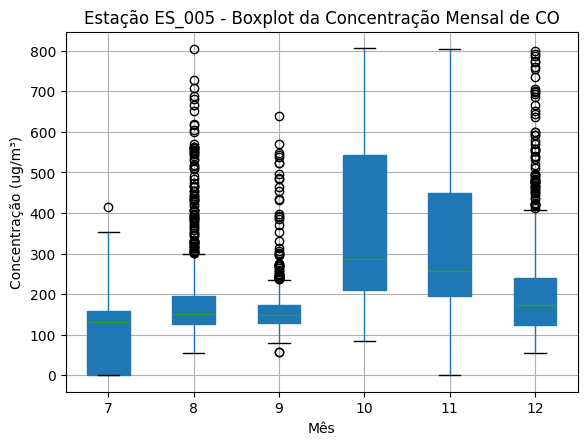

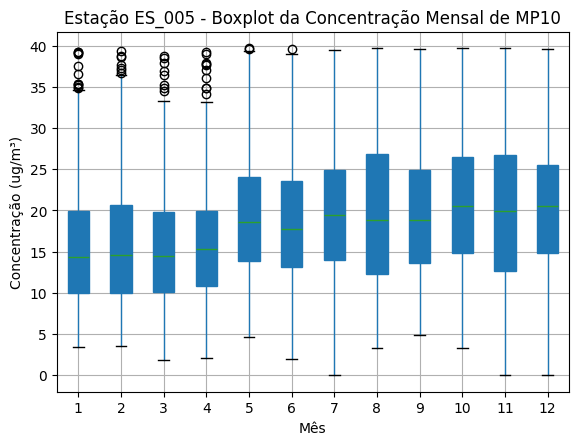

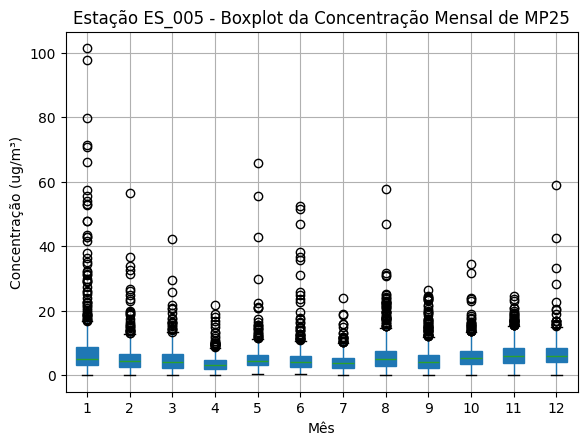

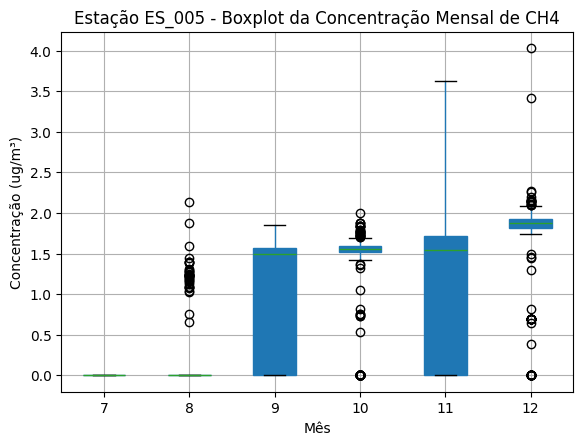

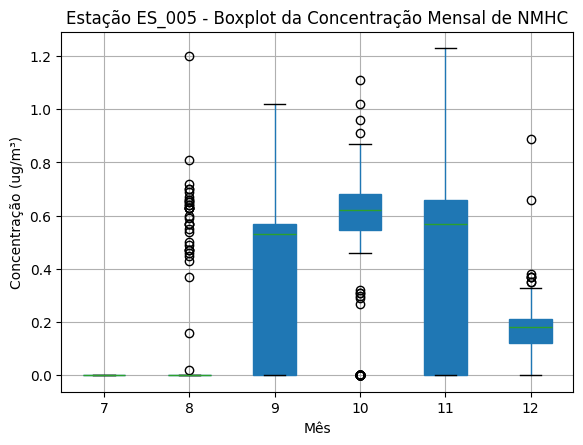

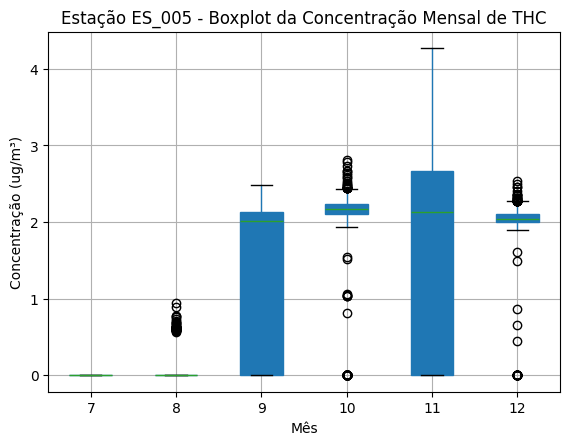

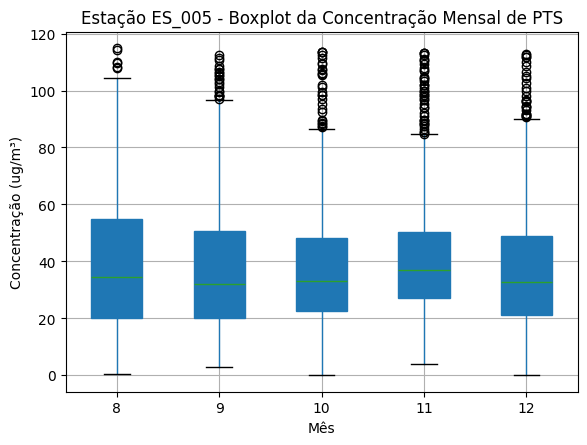

In [207]:
for polu in poluentes:
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)]
    # Removendo valores ausentes da coluna 'Valor'
    df_poluente = df_poluente.dropna(subset=['Valor'])

    if len(df_poluente) > 0:
        mediana = df_poluente['Valor'].median()
        desvio_padrao = df_poluente['Valor'].std()
        # Filtrar para manter apenas os valores que são menores ou iguais a 2 vezes a mediana
        df_poluente = df_poluente[(df_poluente['Valor'] >= mediana-2*desvio_padrao)&(df_poluente['Valor'] <= mediana+2*desvio_padrao)]
        
        # Criando um boxplot por mês
        df_poluente.boxplot(column='Valor', by='Mes', patch_artist=True)
        
        # Ajustando o título e os rótulos
        title = 'Estação '+estacao+' - Boxplot da Concentração Mensal de '+polu
        plt.title(title)
        plt.suptitle("")  # Remove o título automático gerado pelo `by`
        plt.xlabel("Mês")
        plt.ylabel("Concentração (ug/m³)")
        #salvando figuras
        plt.savefig(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.png')        
        plt.show()

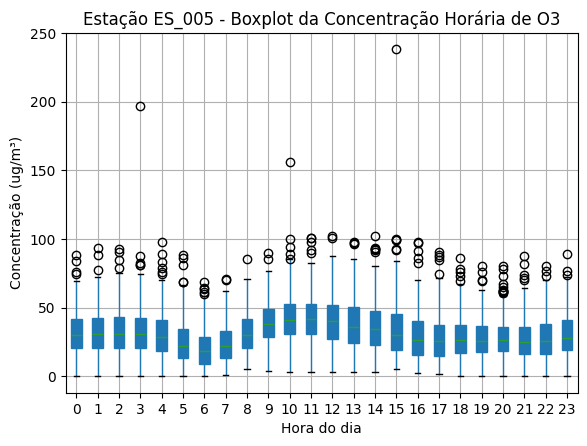

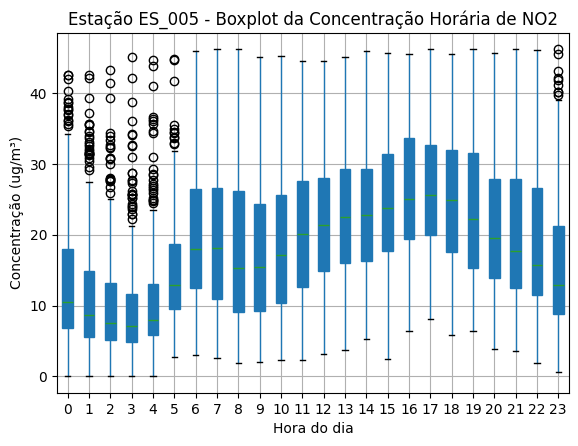

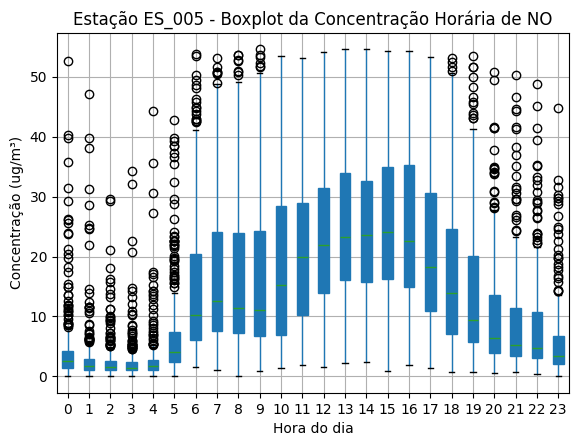

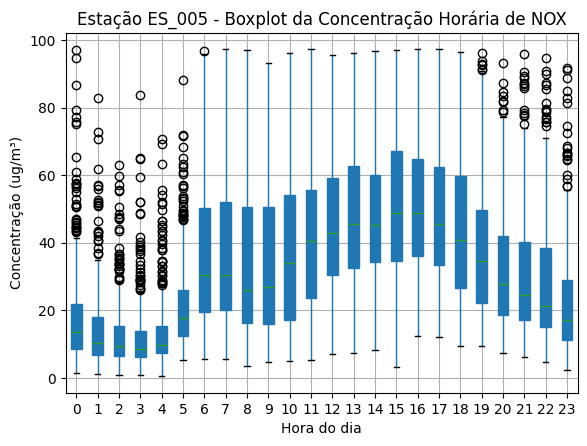

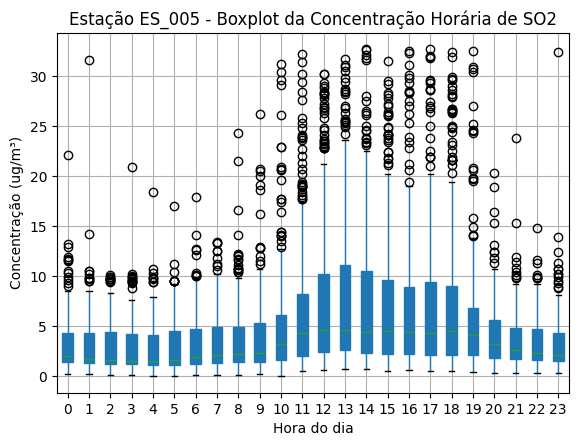

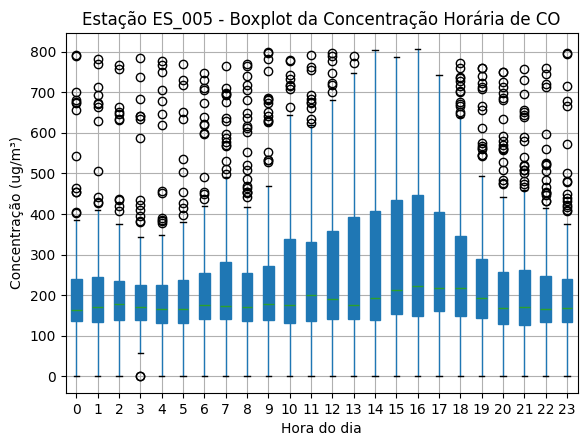

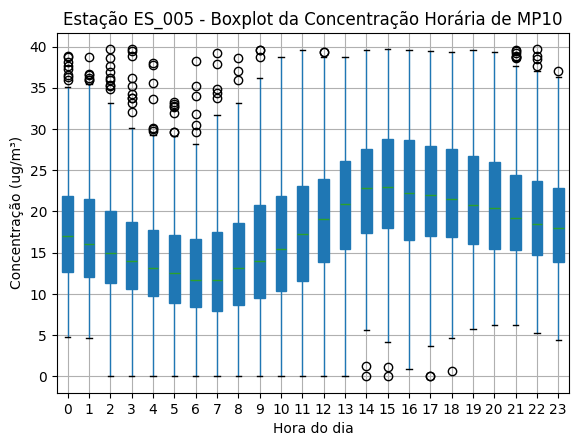

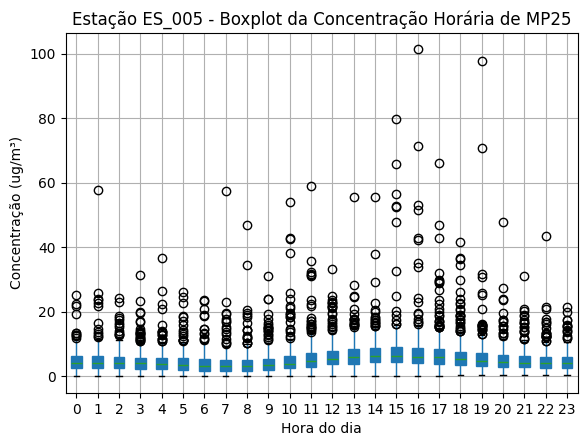

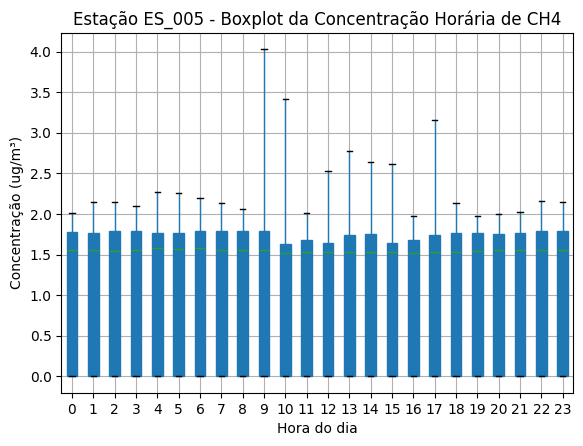

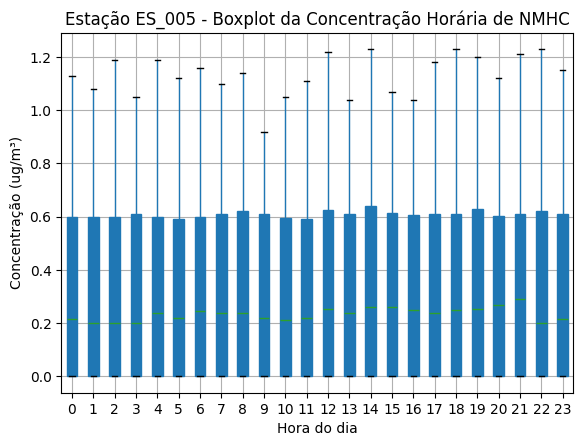

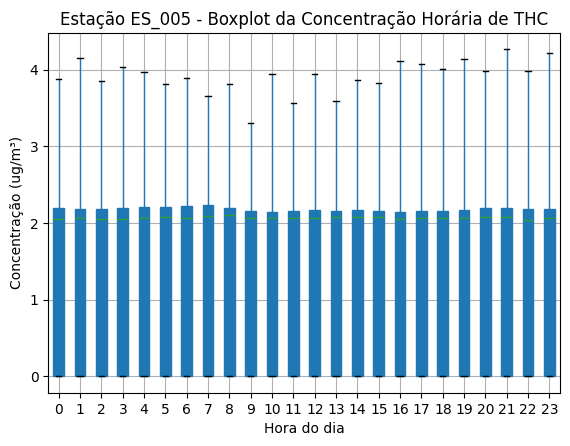

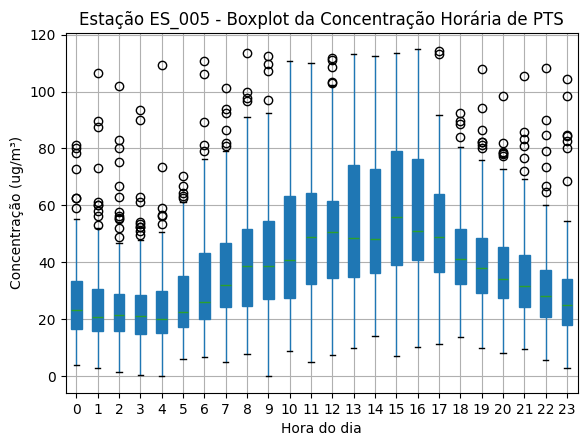

In [208]:
for polu in poluentes:
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)]
    # Removendo valores ausentes da coluna 'Valor'
    df_poluente = df_poluente.dropna(subset=['Valor'])

    if len(df_poluente) > 0:
        mediana = df_poluente['Valor'].median()
        desvio_padrao = df_poluente['Valor'].std()
        # Filtrar para manter apenas os valores que são menores ou iguais a 2 vezes a mediana
        df_poluente = df_poluente[(df_poluente['Valor'] >= mediana-2*desvio_padrao)&(df_poluente['Valor'] <= mediana+2*desvio_padrao)]
        
        # Criando um boxplot por mês
        df_poluente.boxplot(column='Valor', by='Hora', patch_artist=True)
        
        # Ajustando o título e os rótulos
        title = 'Estação '+estacao+' - Boxplot da Concentração Horária de '+polu
        plt.title(title)
        plt.suptitle("")  # Remove o título automático gerado pelo `by`
        plt.xlabel("Hora do dia")
        plt.ylabel("Concentração (ug/m³)")
        #salvando figuras
        plt.savefig(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.png')
        plt.show()

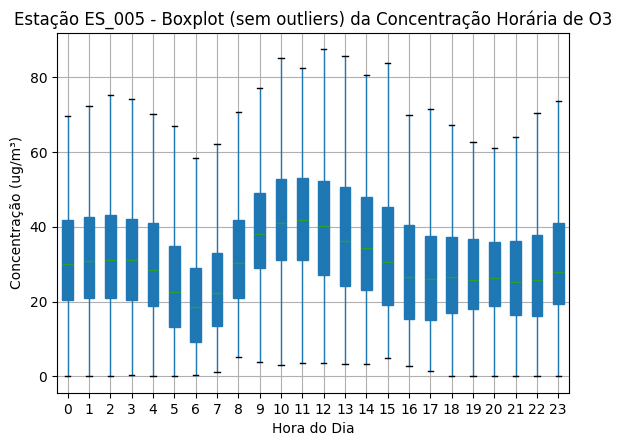

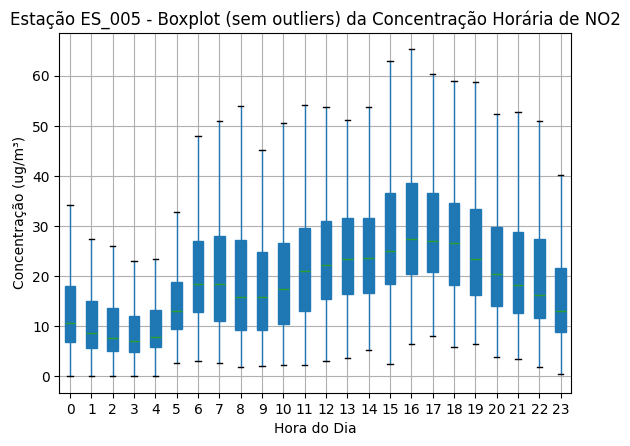

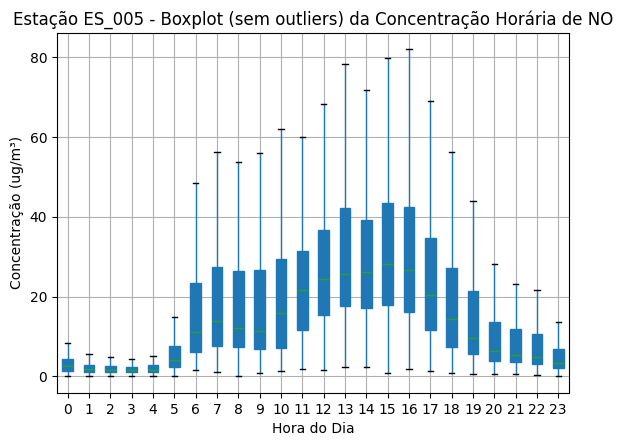

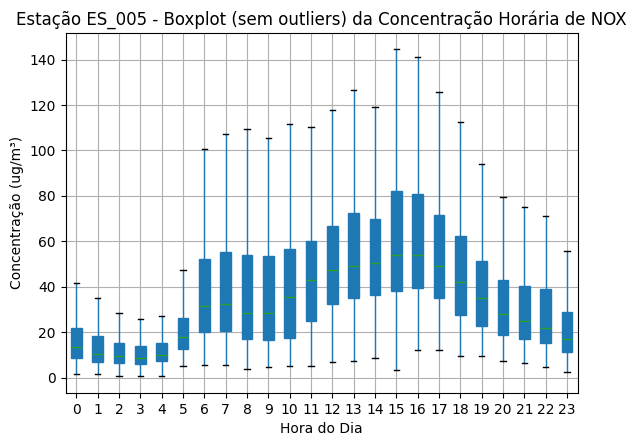

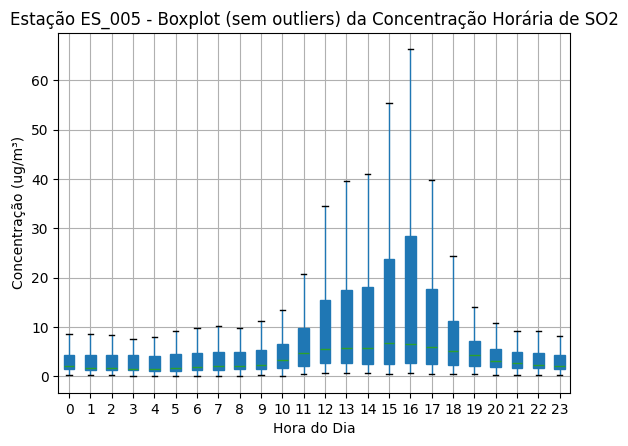

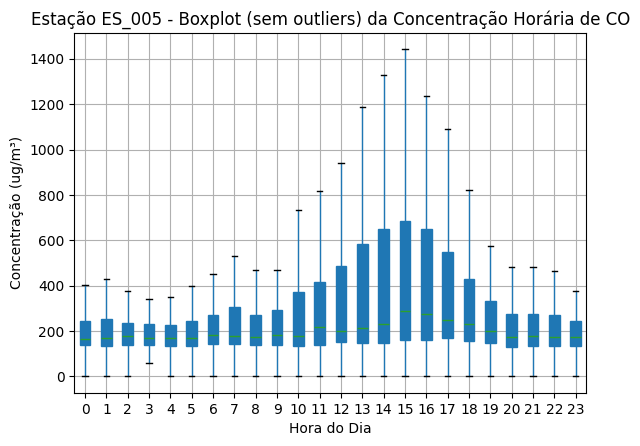

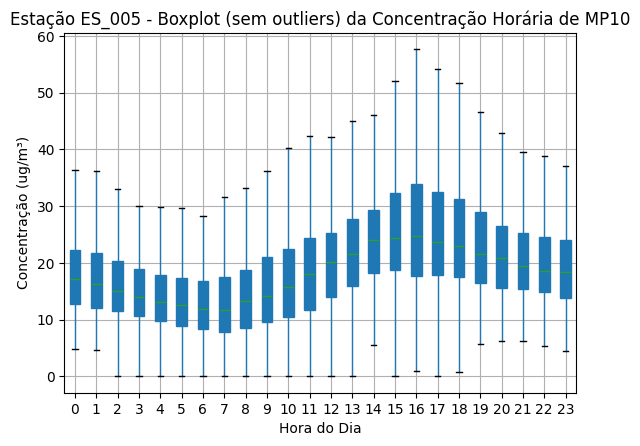

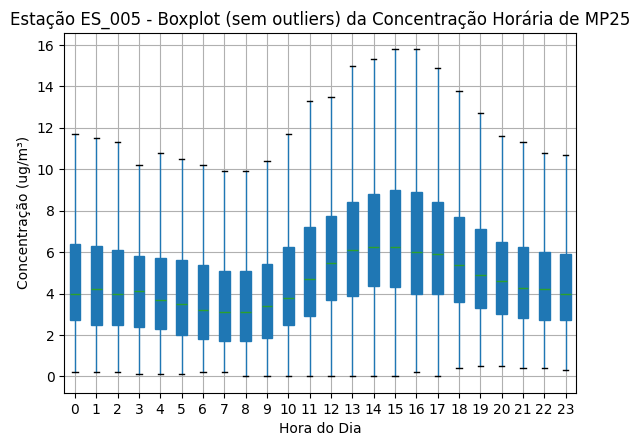

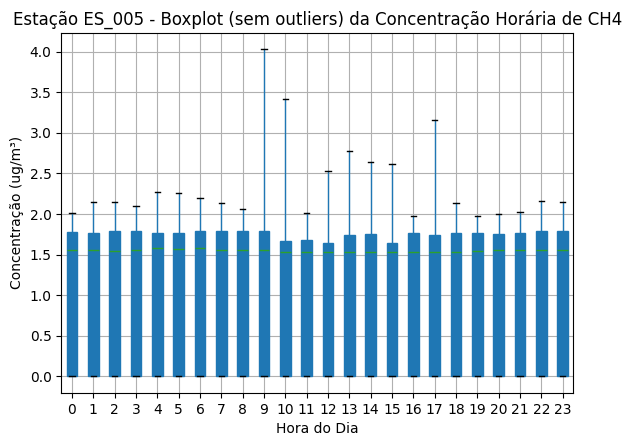

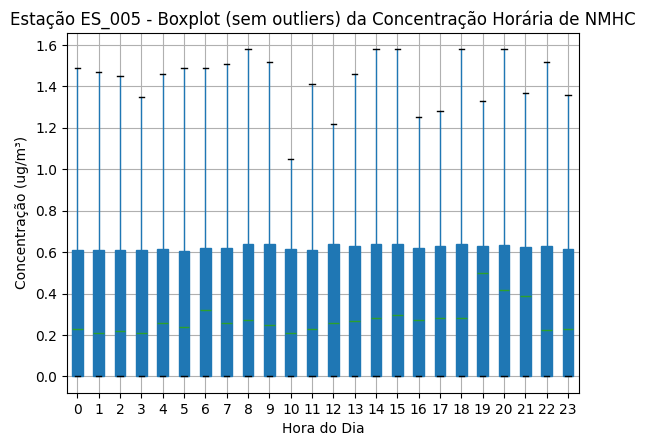

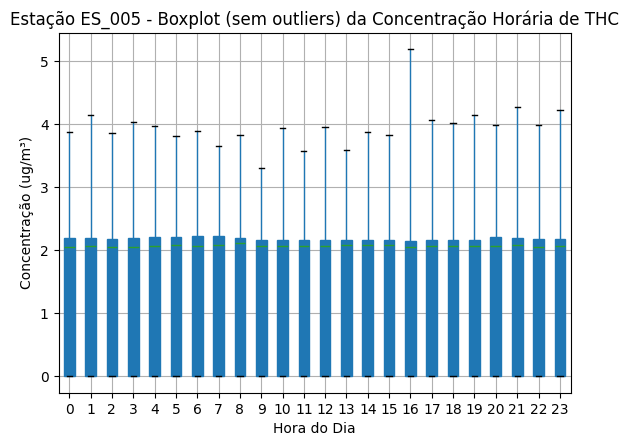

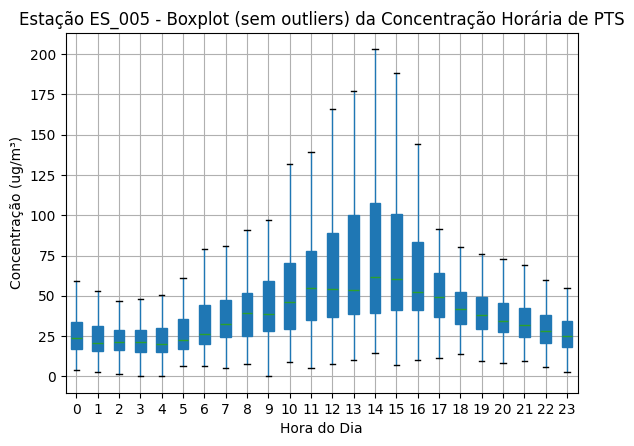

In [209]:
#tirando outliers
for polu in poluentes:
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)]
    # Removendo valores ausentes da coluna 'Valor'
    df_poluente = df_poluente.dropna(subset=['Valor'])

    if len(df_poluente) > 0:
        
        # Criando um boxplot por mês
        df_poluente.boxplot(column='Valor', by='Hora', patch_artist=True,showfliers=False)
        
        # Ajustando o título e os rótulos
        title = 'Estação '+estacao+' - Boxplot (sem outliers) da Concentração Horária de '+polu
        plt.title(title)
        plt.suptitle("")  # Remove o título automático gerado pelo `by`
        plt.xlabel("Hora do Dia")
        plt.ylabel("Concentração (ug/m³)")
        #salvando figuras
        plt.savefig(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.png')
        plt.show()

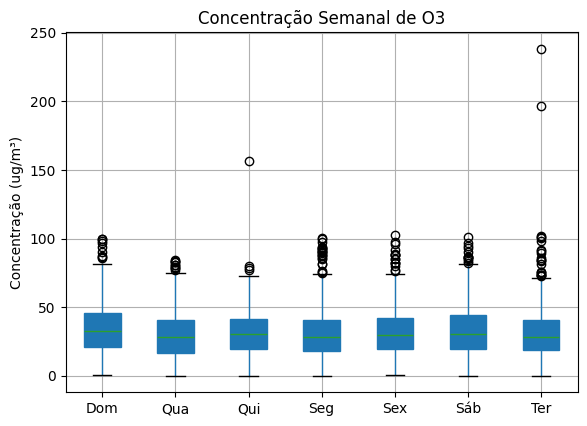

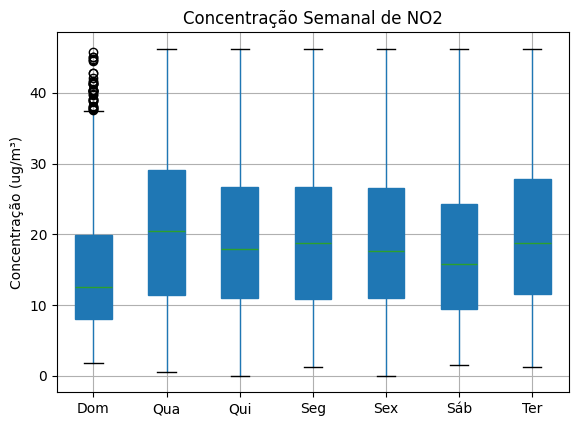

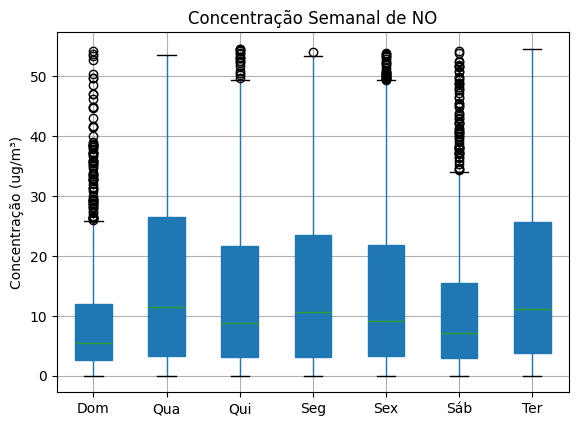

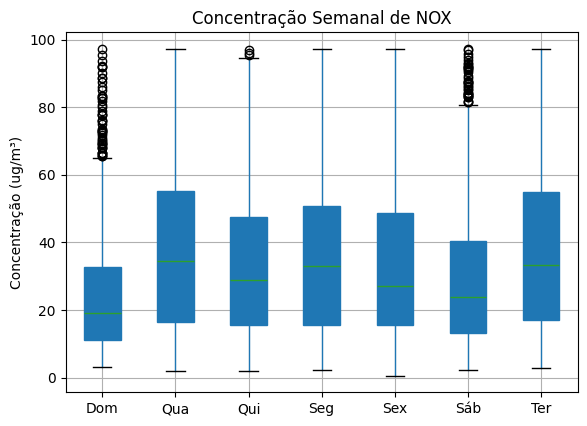

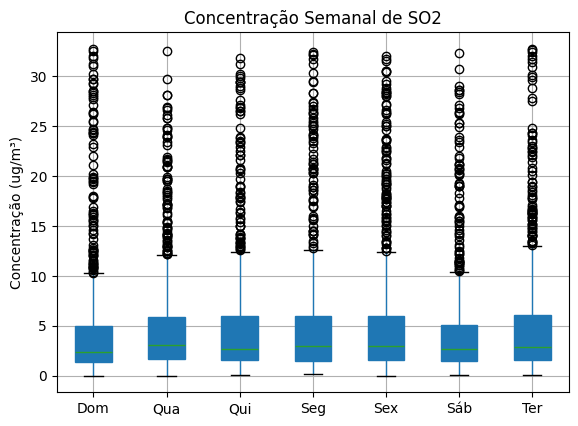

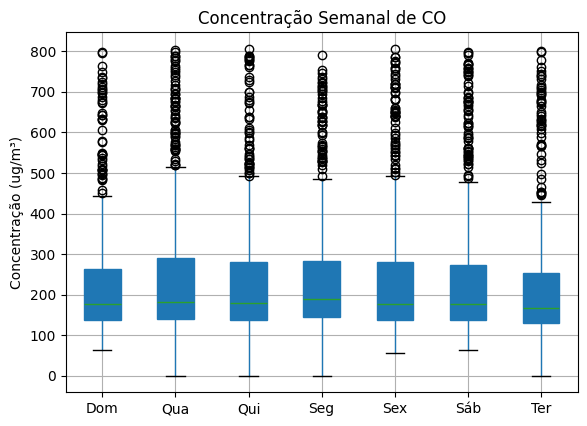

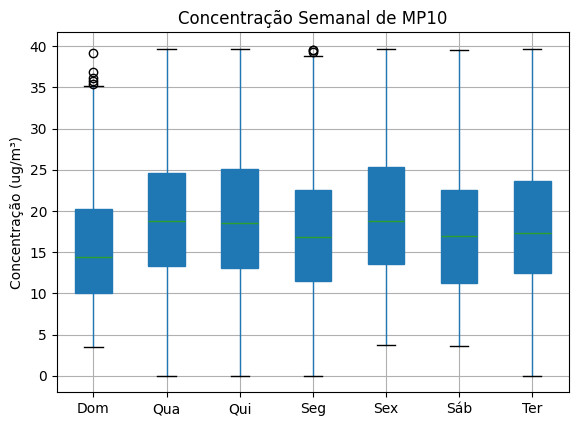

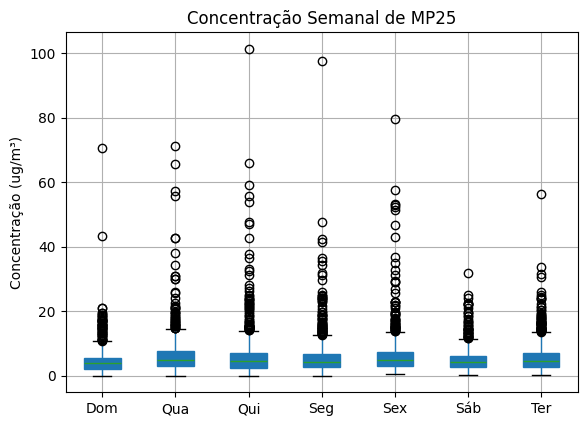

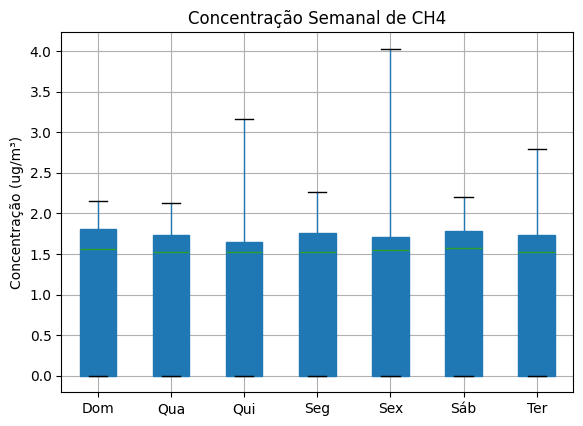

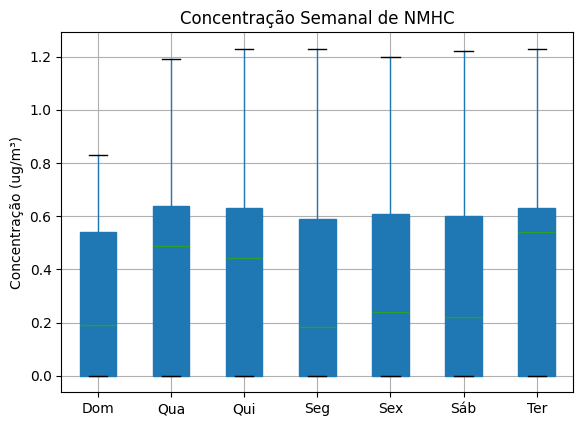

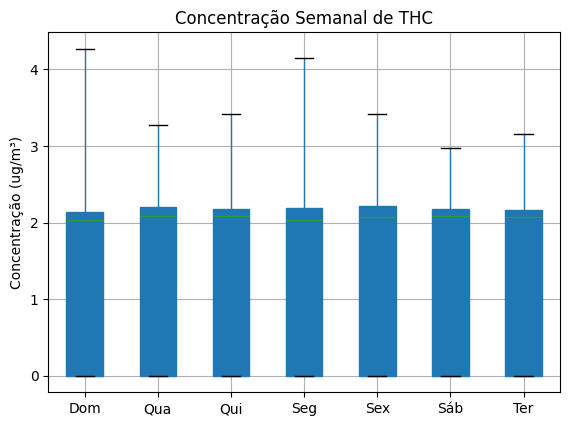

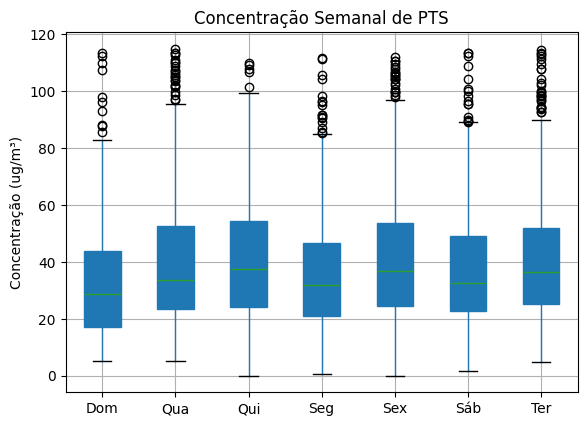

In [210]:

for polu in poluentes:
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)].copy()
    
    # Removendo valores ausentes da coluna 'Valor'
    df_poluente = df_poluente.dropna(subset=['Valor'])

    if len(df_poluente) > 0:
        mediana = df_poluente['Valor'].median()
        desvio_padrao = df_poluente['Valor'].std()
        # Filtrar para manter apenas os valores que são menores ou iguais a 2 vezes a mediana
        df_poluente = df_poluente[(df_poluente['Valor'] >= mediana-2*desvio_padrao)&(df_poluente['Valor'] <= mediana+2*desvio_padrao)]
        
        # Criando um boxplot por mês
        df_poluente.boxplot(column='Valor', by='Dia_da_Semana', patch_artist=True)
        
        # Ajustando o título e os rótulos
        plt.title("Concentração Semanal de "+polu)
        plt.suptitle("")  # Remove o título automático gerado pelo `by`
        plt.xlabel("")
        plt.ylabel("Concentração (ug/m³)")
        plt.show()

### Estatísticas Univariadas

In [211]:
for ii,polu in enumerate(poluentes):
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)].copy()
    if df_poluente['Valor'].mean()>0:
        print(f'\nEstatísticas Descritivas para o Poluente {polu} (coluna "Valor"):')
        statistics = df_poluente['Valor'].describe()
        print(statistics)
        title = 'Estação '+estacao+' - Estatisticas do '+polu
        statistics.to_csv(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.csv')
        print("\nEstatísticas descritivas por mês:")
        statistics_mes = df_poluente.groupby('Mes')['Valor'].describe()
        print(statistics_mes)
        title = 'Estação '+estacao+' - Estatisticas por Mês do '+polu
        statistics_mes.to_csv(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.csv')
        print("\nEstatísticas descritivas por hora:")
        statistics_hora = df_poluente.groupby('Hora')['Valor'].describe()
        print(statistics_mes)
        title = 'Estação '+estacao+' - Estatisticas por Hora do '+polu
        statistics_hora.to_csv(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.csv')
        print("\nEstatísticas descritivas por dia da semana:")
        statistics_semana = df_poluente.groupby('Dia_da_Semana')['Valor'].describe()
        print(statistics_semana)
        title = 'Estação '+estacao+' - Estatisticas por Dia da Semana do '+polu
        statistics_semana.to_csv(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.csv')



Estatísticas Descritivas para o Poluente O3 (coluna "Valor"):
count     8393.000000
mean        44.223188
std        321.057955
min          0.000000
25%         19.250000
50%         29.770000
75%         42.450000
max      14486.600000
Name: Valor, dtype: float64

Estatísticas descritivas por mês:
     count        mean          std   min      25%     50%      75%       max
Mes                                                                          
1    719.0   27.746926    14.114685  1.47  18.4850  26.500  36.0600    156.25
2    669.0   24.877489    11.746001  2.35  16.7500  23.190  30.5400     68.02
3    741.0   23.283158    11.235106  1.03  15.8500  21.990  29.8900     73.07
4    719.0   25.674604    13.217074  0.79  16.1350  25.110  34.2150     69.72
5    742.0   27.438491    17.472768  0.00  13.2425  26.200  39.6450     73.84
6    719.0   28.466676    15.866790  0.00  17.5750  27.270  38.9350     83.40
7    450.0   34.654489    16.208889  0.00  23.9450  33.975  44.7350     94